# Prosper Loan Data Exploration
## by Arshi Saleh

## Preliminary Wrangling

> This document explores a dataset containing information about an online personal loan service based on peer to peer lending. This service connects borrowers directly to investors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the dataset into the pandas dataframe.
prosper_loan=pd.read_csv('prosperLoanData.csv')

In [3]:
#overview of the dataset
print(prosper_loan.head(10))

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Curr

In [4]:
# high-level overview of data shape and composition
pd.set_option('display.max_columns', None)
print(prosper_loan.shape)
print(prosper_loan.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
#CreditGrade and ProsperRating (Alpha) both provide the borrower ratings
#CreditGrade is pre 2009 and ProsperRating is post July,2009
#Hence to get a tidy dataset we can melt the two columns
#create a copy of the dataset
prosper_loan_sub=prosper_loan.copy()
#remove extra columns and melt into a single column
prosper_loan_sub= pd.melt(prosper_loan_sub, id_vars=['ListingKey','Term','LoanStatus','LenderYield','EstimatedReturn','Occupation','EmploymentStatus',
                        'LoanOriginalAmount','ListingCreationDate','ListingCategory (numeric)',
                        'CreditScoreRangeLower','CreditScoreRangeUpper','AmountDelinquent','TotalTrades',
                        'DelinquenciesLast7Years','InquiriesLast6Months','BankcardUtilization','DebtToIncomeRatio','IncomeRange',
                         'IncomeVerifiable','StatedMonthlyIncome','OnTimeProsperPayments','PublicRecordsLast10Years',
                         'PublicRecordsLast12Months','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
                        'TotalCreditLinespast7years','FirstRecordedCreditLine','TotalProsperLoans','ProsperPaymentsLessThanOneMonthLate',
                        'ProsperPaymentsOneMonthPlusLate'],
                           value_vars =['CreditGrade', 'ProsperRating (Alpha)'], var_name='stages', value_name='ProsperCreditRating')
prosper_loan_sub=prosper_loan_sub.drop(['stages'], axis = 1)

In [6]:
#drop duplicate rows
#https://stackoverflow.com/questions/59532750/drop-duplicate-if-the-value-in-another-column-is-null-pandas
prosper_loan_sub = prosper_loan_sub.dropna(subset=['ProsperCreditRating']).drop_duplicates('ListingKey')

In [7]:
#reset index
prosper_loan_sub.reset_index(drop=True, inplace=True)

In [8]:
#check if the new column ProsperCreditRating is created and the old columns+not necessary columns have been removed
list(prosper_loan_sub)

['ListingKey',
 'Term',
 'LoanStatus',
 'LenderYield',
 'EstimatedReturn',
 'Occupation',
 'EmploymentStatus',
 'LoanOriginalAmount',
 'ListingCreationDate',
 'ListingCategory (numeric)',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'AmountDelinquent',
 'TotalTrades',
 'DelinquenciesLast7Years',
 'InquiriesLast6Months',
 'BankcardUtilization',
 'DebtToIncomeRatio',
 'IncomeRange',
 'IncomeVerifiable',
 'StatedMonthlyIncome',
 'OnTimeProsperPayments',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'TotalCreditLinespast7years',
 'FirstRecordedCreditLine',
 'TotalProsperLoans',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperCreditRating']

In [9]:
#check the total number of rows
sum(prosper_loan_sub.ProsperCreditRating.value_counts())

112935

In [10]:
#change the name of the column 'ListingCategory (numeric)' to ListingCategory
prosper_loan_sub.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [11]:
#confirm changes for column names
print(prosper_loan_sub.columns)

Index(['ListingKey', 'Term', 'LoanStatus', 'LenderYield', 'EstimatedReturn',
       'Occupation', 'EmploymentStatus', 'LoanOriginalAmount',
       'ListingCreationDate', 'ListingCategory', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'AmountDelinquent', 'TotalTrades',
       'DelinquenciesLast7Years', 'InquiriesLast6Months',
       'BankcardUtilization', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'OnTimeProsperPayments',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'TotalCreditLinespast7years', 'FirstRecordedCreditLine',
       'TotalProsperLoans', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperCreditRating'],
      dtype='object')


In [12]:
#observe the statistics of the dataset
print(prosper_loan_sub.describe())

                Term    LenderYield  EstimatedReturn  LoanOriginalAmount  \
count  112935.000000  112935.000000     83982.000000       112935.000000   
mean       40.805950       0.182917         0.096246         8319.549900   
std        10.425935       0.074595         0.030475         6238.105771   
min        12.000000      -0.010000        -0.182700         1000.000000   
25%        36.000000       0.124600         0.074630         4000.000000   
50%        36.000000       0.174000         0.092110         6300.000000   
75%        36.000000       0.240600         0.117100        12000.000000   
max        60.000000       0.492500         0.283700        35000.000000   

       ListingCategory  CreditScoreRangeLower  CreditScoreRangeUpper  \
count    112935.000000          112344.000000          112344.000000   
mean          2.776703             685.495087             704.495087   
std           3.999680              66.642271              66.642271   
min           0.000000     

In [13]:
#check the general information about the dataset ,for example, number of non-null values and datatype
print(prosper_loan_sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112935 entries, 0 to 112934
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           112935 non-null  object 
 1   Term                                 112935 non-null  int64  
 2   LoanStatus                           112935 non-null  object 
 3   LenderYield                          112935 non-null  float64
 4   EstimatedReturn                      83982 non-null   float64
 5   Occupation                           109406 non-null  object 
 6   EmploymentStatus                     110680 non-null  object 
 7   LoanOriginalAmount                   112935 non-null  int64  
 8   ListingCreationDate                  112935 non-null  object 
 9   ListingCategory                      112935 non-null  int64  
 10  CreditScoreRangeLower                112344 non-null  float64
 11  CreditScoreRa

In [14]:
#observe a sample of the dataset (first 5 rows)
prosper_loan_sub.head(5)

,ListingKey,Term,LoanStatus,LenderYield,EstimatedReturn,Occupation,EmploymentStatus,LoanOriginalAmount,ListingCreationDate,ListingCategory,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,TotalTrades,DelinquenciesLast7Years,InquiriesLast6Months,BankcardUtilization,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,OnTimeProsperPayments,PublicRecordsLast10Years,PublicRecordsLast12Months,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,TotalCreditLinespast7years,FirstRecordedCreditLine,TotalProsperLoans,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperCreditRating
0,1021339766868145413AB3B,36,Completed,0.1380,NaN,Other,Self-employed,9425,2007-08-26 19:09:29.263000000,0,640.0,659.0,472.0,11.0,4.0,3.0,0.00,0.17,"$25,000-49,999",True,3083.333333,NaN,0.0,0.0,NaN,NaN,12.0,2001-10-11 00:00:00,NaN,NaN,NaN,C
1,0EE9337825851032864889A,36,Completed,0.2400,NaN,Other,Not available,3001,2007-01-05 15:00:47.090000000,0,480.0,499.0,NaN,NaN,0.0,0.0,NaN,0.06,Not displayed,True,2083.333333,NaN,0.0,NaN,NaN,NaN,3.0,2002-07-27 00:00:00,NaN,NaN,NaN,HR
2,0F1734025150298088A5F2B,36,Completed,0.1225,NaN,Waiter/Waitress,Full-time,1000,2007-10-09 20:28:33.640000000,0,640.0,659.0,2224.0,7.0,1.0,3.0,0.32,0.27,"$1-24,999",True,1666.666667,NaN,0.0,0.0,NaN,NaN,10.0,2000-11-13 00:00:00,NaN,NaN,NaN,C
3,0FDF336575182398852A8DC,36,Chargedoff,0.1175,NaN,Professional,Not available,10000,2006-08-15 12:21:09.433000000,0,760.0,779.0,NaN,NaN,0.0,7.0,NaN,0.12,Not displayed,True,5833.333333,NaN,0.0,NaN,NaN,NaN,36.0,1990-05-19 00:00:00,NaN,NaN,NaN,AA
4,1017340630713945364DA6B,36,Completed,0.1975,NaN,Professional,Full-time,3000,2007-11-30 20:33:49.227000000,0,620.0,639.0,5200.0,6.0,5.0,0.0,0.08,0.09,"$25,000-49,999",True,3750.000000,NaN,1.0,0.0,NaN,NaN,13.0,2003-06-20 00:00:00,NaN,NaN,NaN,D


### What is the structure of your dataset?

> The prosper loan data set has 113937 rows and 81 columns. I will be working with 32 columns which are a mix of numeric and categorical datatypes and one column has bool datatype. There are 112935 rows in the dataset after the initial restructuring which includes melting columns CreditGrade and ProsperRating (Alpha) as both of them provide ratings, the first for time period before 2009 and the second for time period after July, 2009.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding the features which will help create a risk filtering model for investors get maximum return while maintaining a mixed portfolio with varied levels of risk. The aim is to help investors avoid borrowers who are more likely to default. The main features of interest are LoanStatus, ListingCategory, LoanOriginalAmount, AmountDelinquent, DelinquenciesinLast7Years, EstimatedReturn.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the employment status, purpose of taking loan(ListingCategory), income range, loan duration,CreditScoreUpper &CreditScoreLower, ProsperCreditRating(Alpha) and no of InquiriesInLast6Months are few of the factors which will help support my investigation. I will also be observing the occupation, debt to income ratio, Public records in last 12 Months, status of IncomeVerifiable, ProsperPaymentsLessThanOneMonthLate and ProsperPaymentsOneMonthPlusLate.

## Univariate Exploration

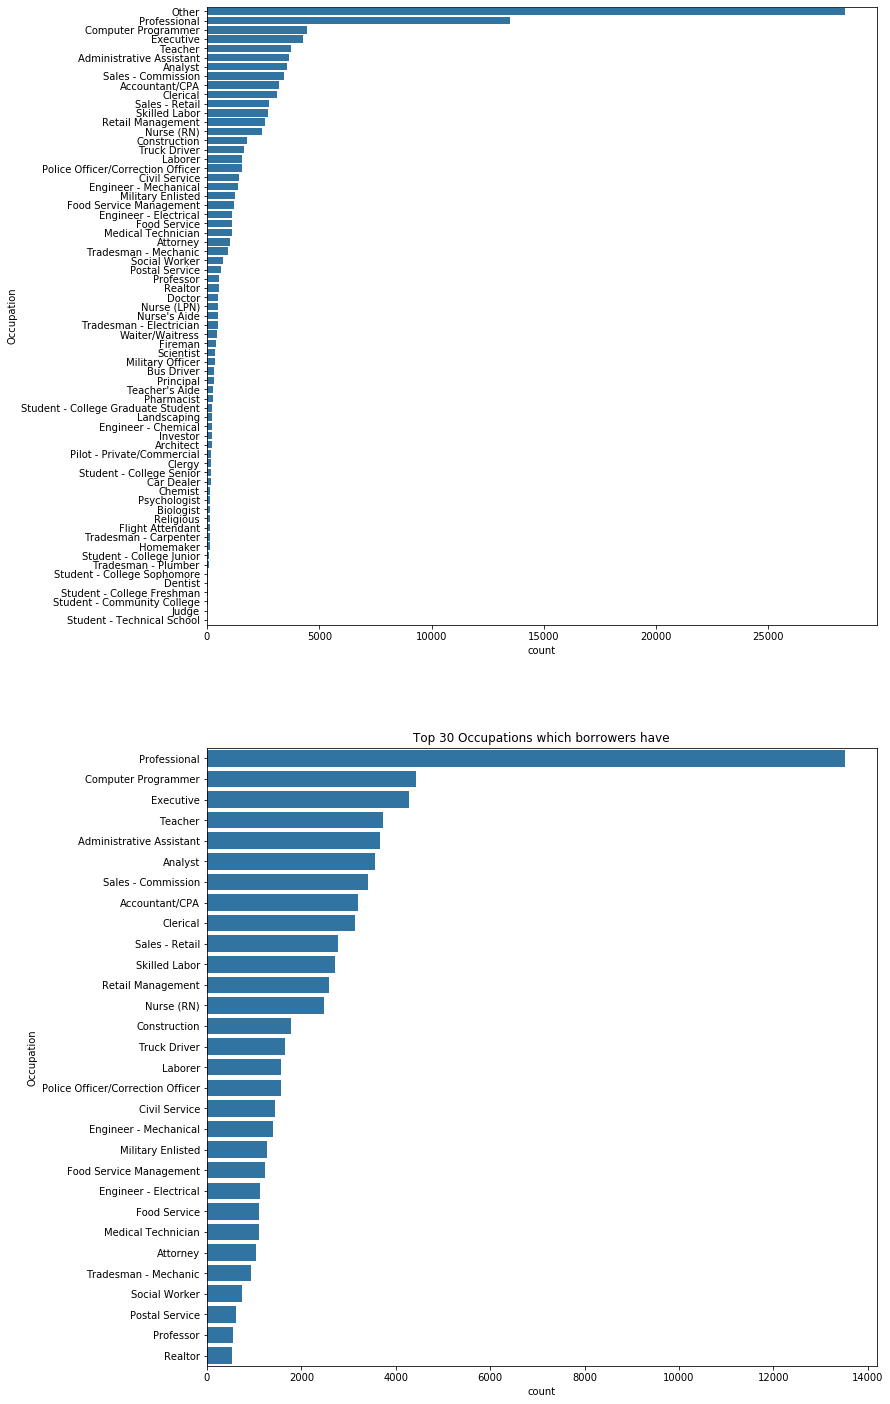

In [15]:
#plot and explore the occupation column
plt.figure(figsize = [12, 25])
base_color = sb.color_palette()[0]

#create subplots to compare plots with and without outliers
plt.subplot(2, 1, 1)
occupation_order1 = prosper_loan_sub['Occupation'].value_counts().index
sb.countplot(data = prosper_loan_sub, y = 'Occupation', color = base_color, order = occupation_order1)

#remove outliers and plot 
df= prosper_loan_sub.query('Occupation !="Other"')

plt.subplot(2, 1, 2)
occupation_order2 = df['Occupation'].value_counts().head(30).index
sb.countplot(data = df, y = 'Occupation', color = base_color, order = occupation_order2)
plt.title('Top 30 Occupations which borrowers have');

>We can observe from the above graph that 'Other' is an outlier and we do know that the other option doesnot reflect any specific Occupation. 

>To explore further we have created a subplot without the outliers. We have removed 'Other' and plotted to show the top thirty professions(on basis of frequency)

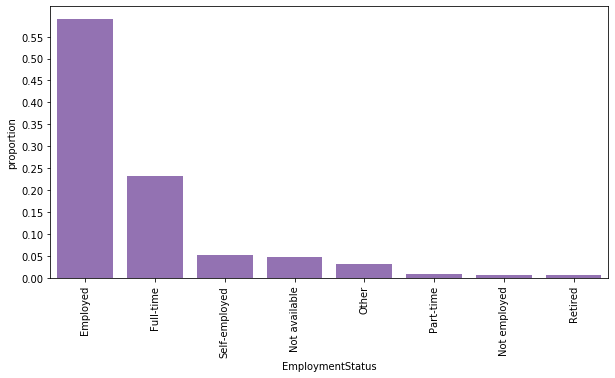

In [16]:
# Distribution by Proportion of EmploymentStatus
# get proportion taken by most common group for derivation
# of tick marks
n_points = prosper_loan_sub.shape[0]
max_count = prosper_loan_sub['EmploymentStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plot and explore the EmploymentStatus column
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[4]
employ_status_order = prosper_loan_sub['EmploymentStatus'].value_counts().index
sb.countplot(data = prosper_loan_sub, x = 'EmploymentStatus', color = base_color, order = employ_status_order)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xticks(rotation = 90);

We can observe from the above bar graph that proportion of people employed is high. Employed can be Full-time or Part-time so we have placed these three values into a single value "Employed". 

In [17]:
#Merge categories Full-time and Part-time with category Employed
prosper_loan_sub["EmploymentStatus"].replace({"Full-time": "Employed", "Part-time": "Employed"}, inplace=True)

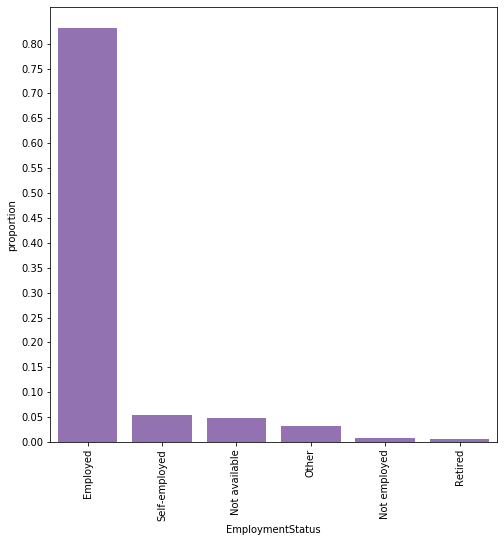

In [18]:
# Distribution by Proportion of EmploymentStatus
#plot the graph again so that we can get a better overview with new distribution
# get proportion taken by most common group for derivation
# of tick marks
n_points = prosper_loan_sub.shape[0]
max_count = prosper_loan_sub['EmploymentStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plot and explore the EmploymentStatus column
plt.figure(figsize = [8, 8])
base_color = sb.color_palette()[4]
employ_status_order = prosper_loan_sub['EmploymentStatus'].value_counts().index
sb.countplot(data = prosper_loan_sub, x = 'EmploymentStatus', color = base_color, order = employ_status_order)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xticks(rotation = 90);

>We can observe from the graph that more than 80% of the borrowers are employed, around 5% are self employed and around 1-2% are not employed. There are around 2% borrowers who are retired.

>Let us observe the Listing Categories so that we get an idea about the different reasons for taking loan. Since Listing Category is in numeric form we will convert it into string.

In [19]:
#the values in the ListingCategory are in numeric form, I have converted to string so that we get a better idea about 
#the various listing categories
prosper_loan_sub["ListingCategory"].replace({0: "Not Available", 1: "Debt Consolidation", 2:"Home Improvement"
                                            ,3:"Business", 4:"Personal Loan", 5:"Student Use",
                                            6:"Auto", 7:"Other", 8:"Baby&Adoption", 9:"Boat",
                                            10:"Cosmetic Procedure", 11:"Engagement Ring",12:"Green Loans", 
                                             13:"Household Expenses", 14:"Large Purchases",
                                            15:" Medical/Dental", 16:"Motorcycle", 17:" RV", 18:"Taxes",
                                            19:"Vacation", 20:"Wedding Loans"}, inplace=True)

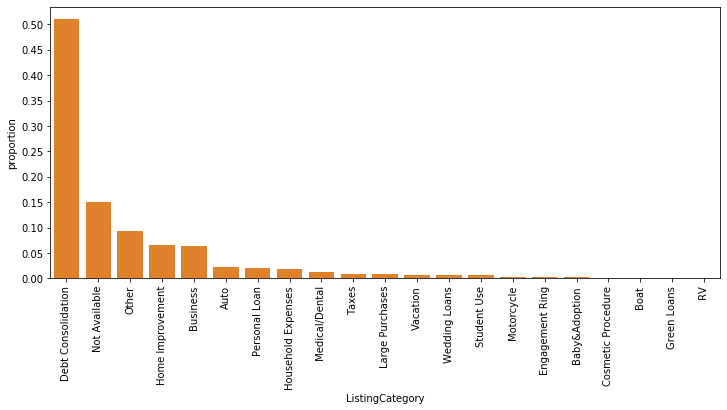

In [20]:
#Distribution by proportion of different ListingCategory
# get proportion taken by most common group for derivation
# of tick marks
n_points = prosper_loan_sub.shape[0]
max_count = prosper_loan_sub['ListingCategory'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plot and explore the ListingCategory column
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[1]
occupation_order = prosper_loan_sub['ListingCategory'].value_counts().index
sb.countplot(data = prosper_loan_sub, x = 'ListingCategory', color = base_color, order = occupation_order)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xticks(rotation = 90);

>From the plot above we can see that Debt Consolidation forms more than 50% of the loans followed by Not Available. It would be interesting to explore the performance of loans which fall in non specific categories.

>Let us take a look into the loan status so that we have an idea about the borrower behaviour in terms of payment.

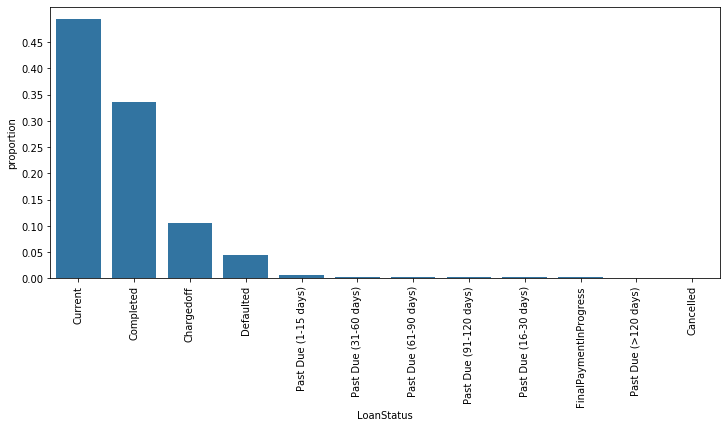

In [21]:
# Plot proportion of various categories of LoanStatus
# get proportion taken by most common group for derivation
# of tick marks
n_points = prosper_loan_sub.shape[0]
max_count = prosper_loan_sub['LoanStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plot and explore the LoanStatus column
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
loan_status_order = prosper_loan_sub['LoanStatus'].value_counts().index

sb.countplot(data = prosper_loan_sub, x = 'LoanStatus', color = base_color, order = loan_status_order)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xticks(rotation = 90);

We can see that more than 45% of loans are current and around 34% completed. Further analysis of the Loan Status will shed more light on the features which are shared by profiles which default, are deliquent, chargedoff or deliquent. 

In [22]:
#find the different categories present in the column
prosper_loan_sub.IncomeRange.value_counts()

$25,000-49,999    31900
$50,000-74,999    30704
$100,000+         17172
$75,000-99,999    16763
Not displayed      7741
$1-24,999          7228
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [23]:
#find the different categories present in the column
prosper_loan_sub.ProsperCreditRating.value_counts()

C     23745
B     19757
D     19323
A     17705
E     13005
HR    10425
AA     8834
NC      141
Name: ProsperCreditRating, dtype: int64

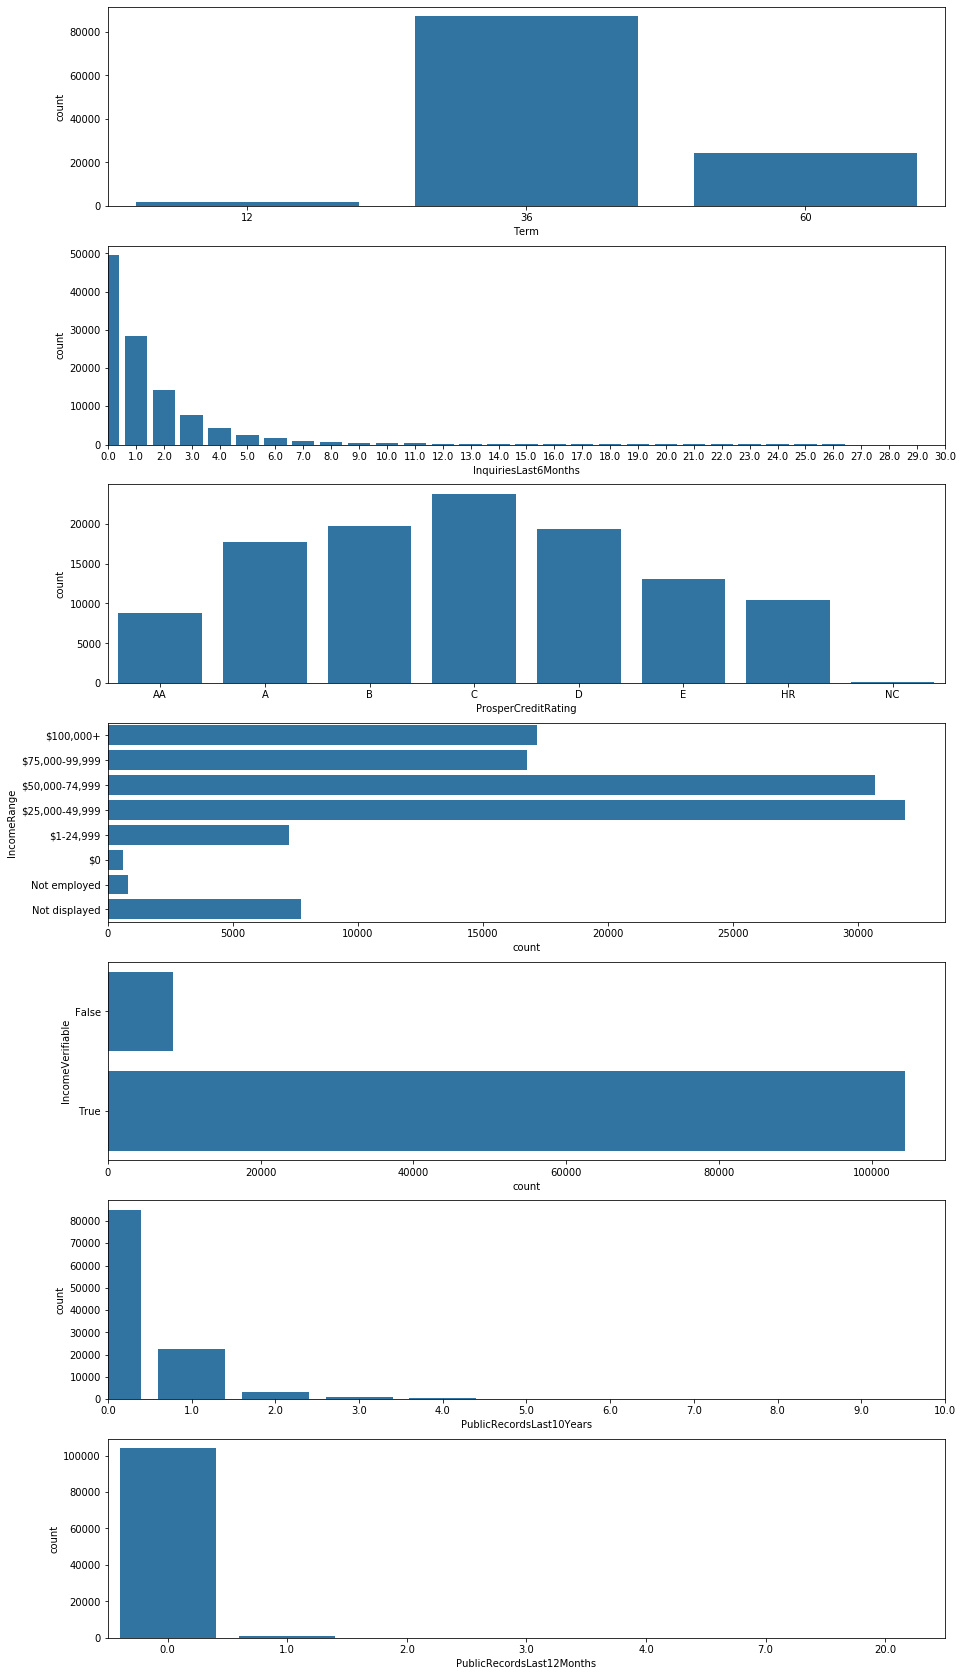

In [24]:
#convert column IncomeRange into ordered categorical data for ordinal data
# this method requires pandas v0.21 or later
level_order = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", 
               "$1-24,999", "$0", "Not employed","Not displayed"]
ordered_cat_income = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
prosper_loan_sub['IncomeRange'] = prosper_loan_sub['IncomeRange'].astype(ordered_cat_income)

#convert column ProsperCreditRating into ordered categorical data for ordinal data
# this method requires pandas v0.21 or later
level_order = ["AA", "A", "B", "C", "D", "E","HR","NC"] #here HR stands for high risk(credit score is below 540) and NC stands for No Score
ordered_cat_rating = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
prosper_loan_sub['ProsperCreditRating'] = prosper_loan_sub['ProsperCreditRating'].astype(ordered_cat_rating)


# let's plot all seven together to get an idea of each ordinal variable's distribution.
plt.figure(figsize = [15,30])

default_color = sb.color_palette()[0]

#plot Distribution of Term 
plt.subplot(7, 1, 1) #7 row, 1 column, subplot 1
sb.countplot(data = prosper_loan_sub, x = 'Term', color = default_color)

#plot Distribution of InquiriesLast6Months
plt.subplot(7, 1, 2) #7 row, 1 column, subplot 2
sb.countplot(data = prosper_loan_sub, x = 'InquiriesLast6Months', color = default_color)
plt.xlim((0, 30))

#plot the Distribution of ProsperCreditRating
plt.subplot(7, 1, 3) #7 row, 1 column, subplot 3
sb.countplot(data = prosper_loan_sub, x = 'ProsperCreditRating', color = default_color)

#plot Distribution of IncomeRange
plt.subplot(7, 1, 4) #7 row, 1 column, subplot 4
sb.countplot(data = prosper_loan_sub, y = 'IncomeRange', color = default_color)

#plot Distribution of IncomeVerifiable
plt.subplot(7, 1, 5) #7 row, 1 column, subplot 5
sb.countplot(data = prosper_loan_sub, y = 'IncomeVerifiable', color = default_color)

#plot Distribution of PublicRecordsLast10Years
plt.subplot(7, 1, 6) #7 row, 1 column, subplot 6
sb.countplot(data = prosper_loan_sub, x = 'PublicRecordsLast10Years', color = default_color)
plt.xlim((0,10))

#plot Distribution of PublicRecordsLast12Months
plt.subplot(7, 1, 7) #7 row, 1 column, subplot 7
sb.countplot(data = prosper_loan_sub, x = 'PublicRecordsLast12Months', color = default_color)
#plt.xlim((0,10))

plt.show();


>There are a number of observations we can make in the Oridinal variable distribution:

1. The 36 month term has the maximum count. This means that more number of borrowers borrow for 36 months. At a later stage I would like to explore if there is a relationship between term and risk.

2. The count for InquiriesLast6Months reflects the number of inquiries/credit checks in the past 6 months at the time the credit profile was pulled. A higher count might reflect greater risk of default. 

3. The count for ProsperCreditRating is maximum for 'C', followed by 'B' and 'D'. Higher ratings mean lower risk but also lower returns. Investors like to maintain a mixed portfolio so that they can get higher returns, hence this will be an important feature to explore further.

4. From the IncomeRange plot we can see that most of the borrowers have an income above 25,000(dollars).

5. From the IncomeVerifiable plot we can see that most of the Income stated has been verified.

6. In the PublicRecordsLast10Years we have limited the plot to a value of 10 because we don't want to invest with people having higher number of Public Records.

7. In the PublicRecordsLast12Months we have an outlier at 20.0. Again we would like to avoid people with public records as chances of default increases. It would be interesting to see if people having higher number of PublicRecordsLast10Years have records in the last 12 months.

C:\Users\Arshi Saleh\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


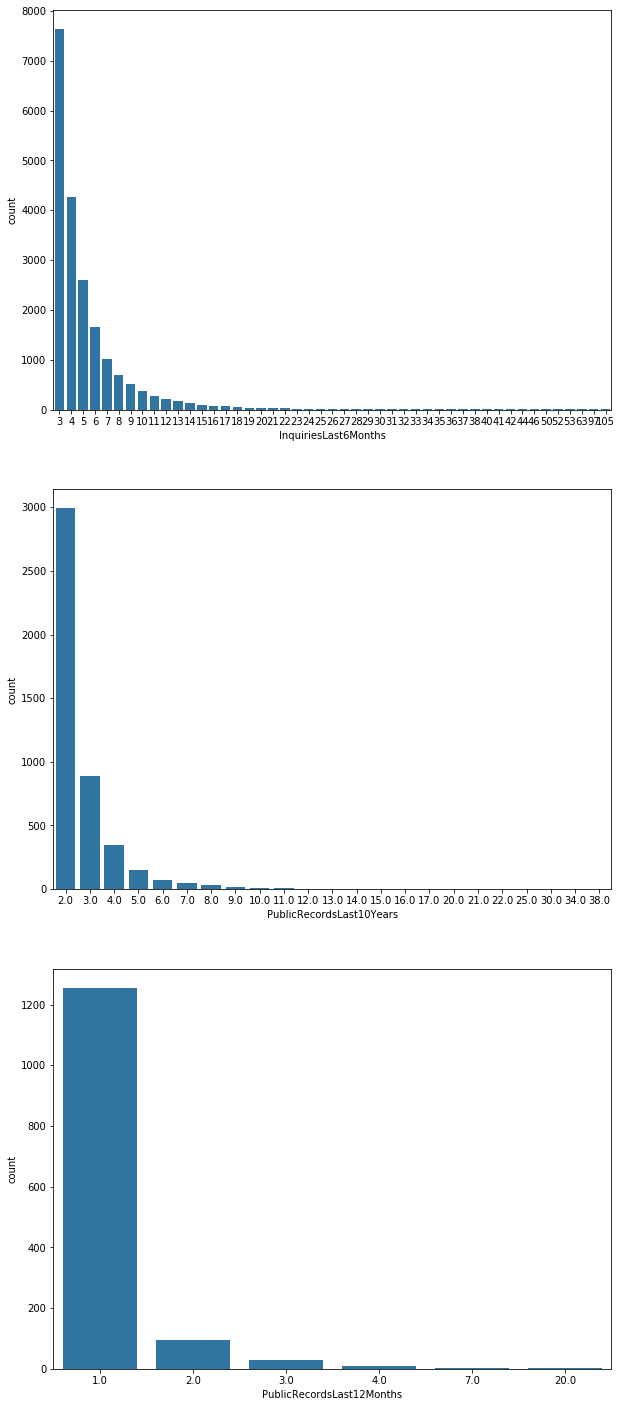

In [25]:
#since there are outliers in InquiriesLast6Months, PublicRecordsLast10Years and PublicRecordsLast12Months 
#we will plot again after removing them
plt.figure(figsize = [10,25])
default_color = sb.color_palette()[0]

#remove value 0.0 from InquiriesLast6Months, PublicRecordsLast10Years and PublicRecordsLast12Months

df3=prosper_loan_sub.query('InquiriesLast6Months>=3.0') #chose values greater than 2.0 
df3['InquiriesLast6Months']=df3['InquiriesLast6Months'].astype(int) #change the datatype to int to plot a cleaner graph

df4=prosper_loan_sub.query('PublicRecordsLast10Years>=2.0')#chose values 2 and greater
df5=prosper_loan_sub.query('PublicRecordsLast12Months>=1.0')#chose value 1 and greater

plt.subplot(3, 1, 1) #3 row, 1 column, subplot 1
sb.countplot(data = df3, x = 'InquiriesLast6Months', color = default_color)

plt.subplot(3, 1, 2) #3 row, 1 column, subplot 2
sb.countplot(data = df4, x = 'PublicRecordsLast10Years', color = default_color)

plt.subplot(3, 1, 3) #3 row, 1 column, subplot 3
sb.countplot(data = df5, x = 'PublicRecordsLast12Months', color = default_color);


> We have replotted InquiriesLast6Months, PublicRecordsLast10Years and PublicRecordsLast12Months after removing values 0.0 for PublicRecordsLast12Months, 0.0 and 1.0 from PublicRecordsLast10Years and 0.0,1.0,2.0 from InquiriesLast6Months.

>After replotting we can see that people with  two PublicRecords in the Last 12 months is around 100 which is significant.

>Less than 1000 people have three public records in the last 10 years.
 
>People who have made 3 inquries in the last 6 months are more than 7000, 4 inquiries is more than 4000 and 5 is around 2500. This information is not obvious without removing outliers.

>Let us observe the credit score frequency of the borrowers. To get a better idea we will be taking the average of CreditScoreRangeLower and CreditScoreRangeUpper to calculate CreditScore

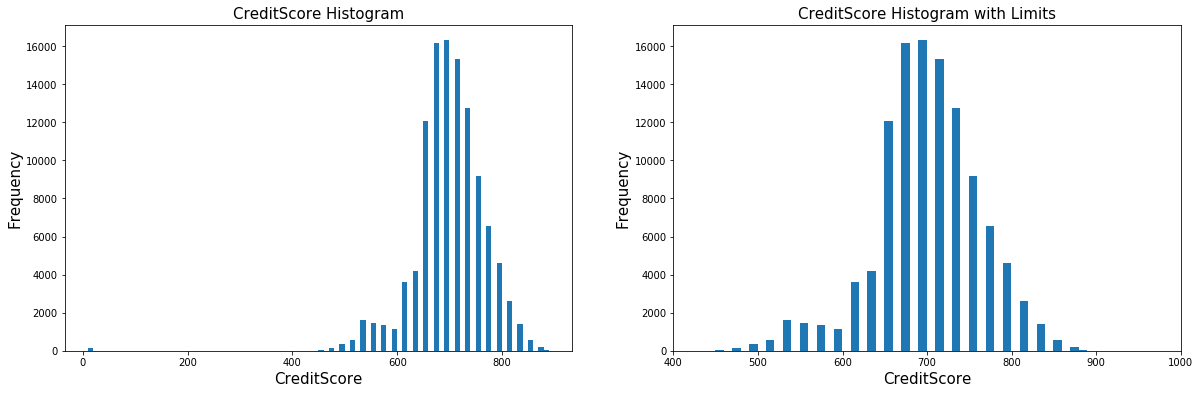

In [26]:
#find the average CreditScore using the columns CreditScoreRangeLower and CreditScoreRangeUpper
prosper_loan_sub['CreditScore']=(prosper_loan_sub['CreditScoreRangeLower']+prosper_loan_sub['CreditScoreRangeUpper'])/2

plt.figure(figsize = [20,6])
default_color = sb.color_palette()[0]

#plot the credit score 
plt.subplot(1, 2, 1) #1 row, 2 column, subplot 1
bin_edges = np.arange(prosper_loan_sub['CreditScore'].min(), prosper_loan_sub['CreditScore'].max()+10, 10)
plt.hist(data = prosper_loan_sub, x = 'CreditScore', color = default_color, bins=bin_edges)
plt.xlabel('CreditScore', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('CreditScore Histogram', fontsize=15)

#plot the credit score within the range 400 to 1000
plt.subplot(1, 2, 2) #1 row, 2 column, subplot 2
bin_edges = np.arange(prosper_loan_sub['CreditScore'].min(), prosper_loan_sub['CreditScore'].max()+10, 10)
plt.hist(data = prosper_loan_sub, x = 'CreditScore', color = default_color, bins=bin_edges);
plt.xlabel('CreditScore', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('CreditScore Histogram with Limits', fontsize=15)
plt.xlim((400, 1000));

>The dataset has two columns for CreditScore, CreditScoreRangeLower and CreditScoreRangeUpper. To make evaluation easier I have created a new column CreditScore(average of the upper and lower range values). The graph has been plotted in 2 subplots , with and without limits. A CreditScore closer to value 0 is an outlier which we need to explore further as Prosper has an eligibility criteria for approval. We can see that most of the CreditScore values lie in the range between 500-900 with peaks around 700. Since our dataset also has ProsperCreditRatings it will be interesting to observe if a strong postitve correlation exists between the two and if not then which parameter is better reflection of the associated risks.

> Let us observe the original loan amount frequency and range.

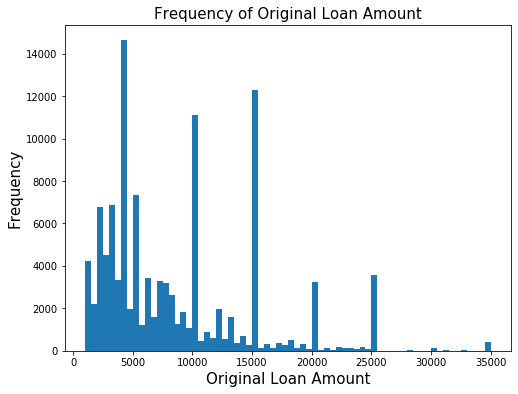

In [27]:
#plot the frequency of the original loan amount
plt.figure(figsize = [8,6])
default_color = sb.color_palette()[0]

#set bin-edges
bin_edges = np.arange(prosper_loan_sub['LoanOriginalAmount'].min(), prosper_loan_sub['LoanOriginalAmount'].max()+10, 500)
#plot the histogram and set the labels
plt.hist(data = prosper_loan_sub, x = 'LoanOriginalAmount', color = default_color, bins=bin_edges)
plt.xlabel('Original Loan Amount', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Original Loan Amount', fontsize=15);


> Plotting the Original Loan amount in bins we can observe that the frequency of borrowers who have originally borrowed an amount less than 5000 is more. We have spikes around 10,000 and 15,000. The graph shows that there are a few borrowers who have borrowed more than 15,000 but most of the borrowers have borrowed a smaller amount.
>The range of loans is observed to be within 1000-35000 dollars.

>Let us now observe the Debt-to-Income ratio. A ratio higher than 1 indicates that the borrower has more debt than income.

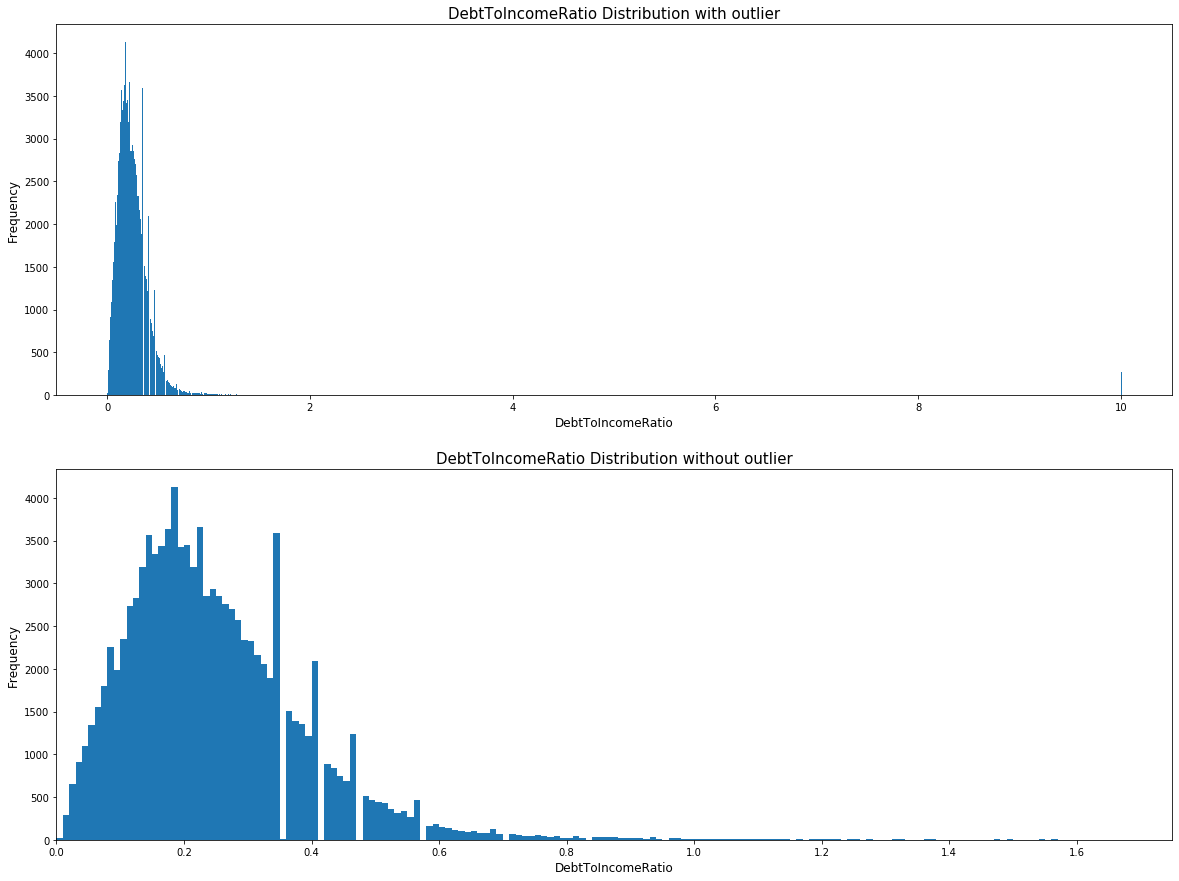

In [28]:
#DebtToIncomeRatio Distribution
plt.figure(figsize = [20,15])
default_color = sb.color_palette()[0]

#plot with outliers
plt.subplot(2, 1, 1)
bin_edges = np.arange(prosper_loan_sub['DebtToIncomeRatio'].min(), prosper_loan_sub['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.hist(data = prosper_loan_sub, x = 'DebtToIncomeRatio', color = default_color, bins=bin_edges)
plt.xlabel('DebtToIncomeRatio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('DebtToIncomeRatio Distribution with outlier', fontsize=15)

#plot within the range 0 to 1.75
plt.subplot(2, 1, 2)
bin_edges = np.arange(prosper_loan_sub['DebtToIncomeRatio'].min(), prosper_loan_sub['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.hist(data = prosper_loan_sub, x = 'DebtToIncomeRatio', color = default_color, bins=bin_edges)
plt.xlabel('DebtToIncomeRatio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('DebtToIncomeRatio Distribution without outlier', fontsize=15)
plt.xlim((0,1.75)); #set limit on x-axis

> We can see in the plot that for most borrowers the Debt to Income ratio is less than 1.0. We do have outliers where the debt to income ratio is 1001%(max possible value) as can be seen in the first plot. 

> A debt to income ratio greater than 1.0 means that the % of debt the borrower has is more than 100% of his income. We would definitely want to avoid investing with borrowers who have more debt than income.

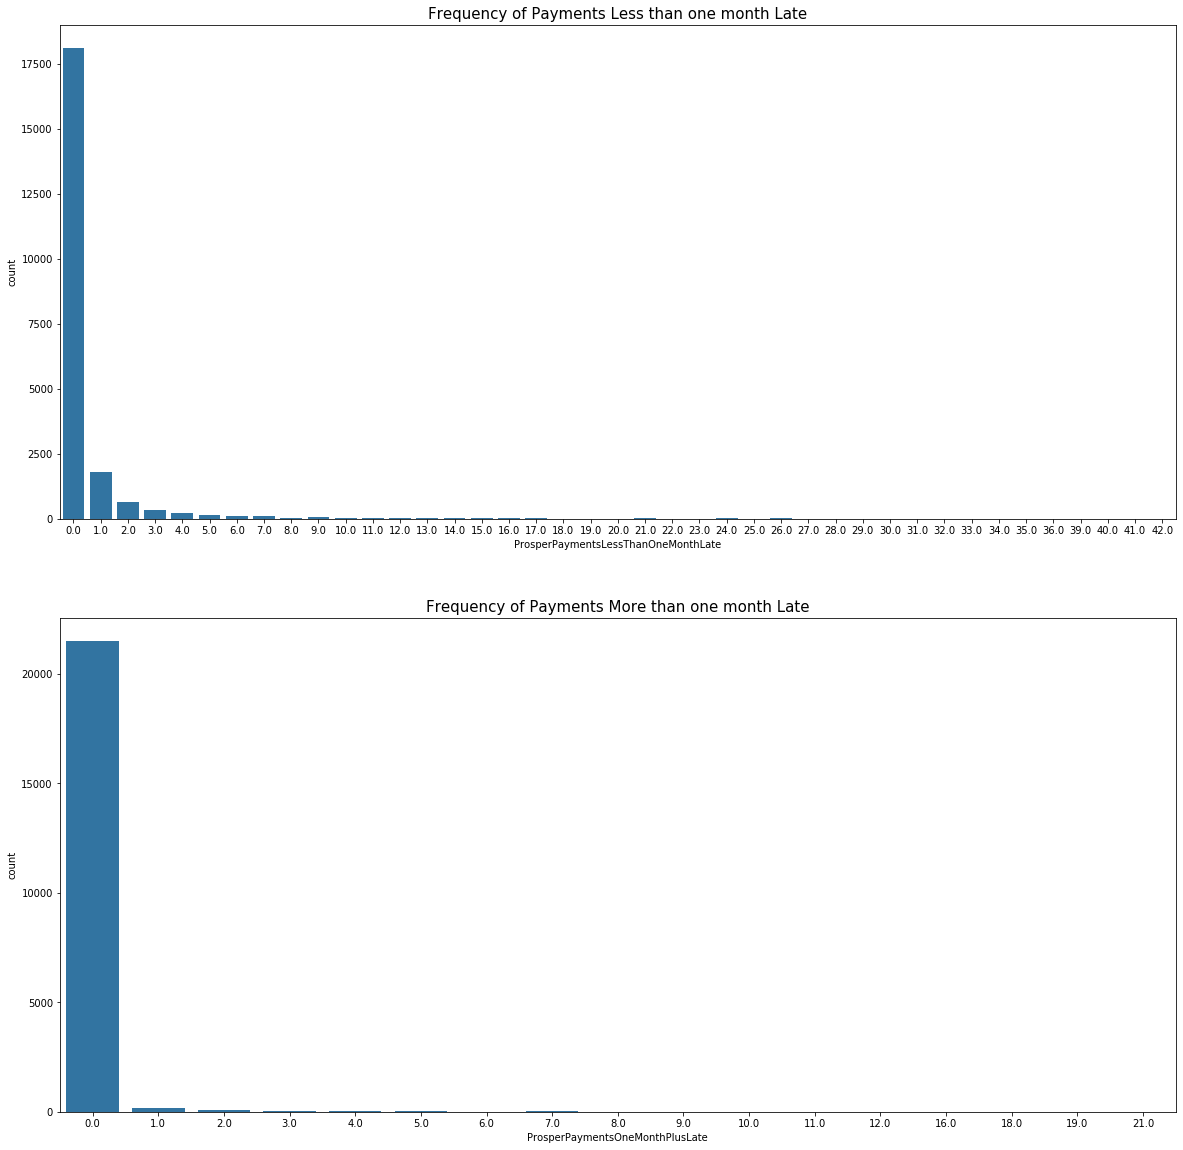

In [29]:
#Plot ProsperPaymentsLessThanOneMonthLate and ProsperPaymentsOneMonthPlusLate so that we can compare graphs
plt.figure(figsize = [20,20])

#plot a countplot for ProsperPaymentLessThanOneMonthLate
default_color = sb.color_palette()[0]
plt.subplot(2, 1, 1) #2 row, 1 column, subplot 1
sb.countplot(data = prosper_loan_sub, x = 'ProsperPaymentsLessThanOneMonthLate', color = default_color)
plt.title('Frequency of Payments Less than one month Late', fontsize=15)

#plot a countplot for ProsperPaymentsOneMonthPlusLate
plt.subplot(2, 1, 2) #2 row, 1 column, subplot 2
sb.countplot(data = prosper_loan_sub, x = 'ProsperPaymentsOneMonthPlusLate', color = default_color);
plt.title('Frequency of Payments More than one month Late', fontsize=15);

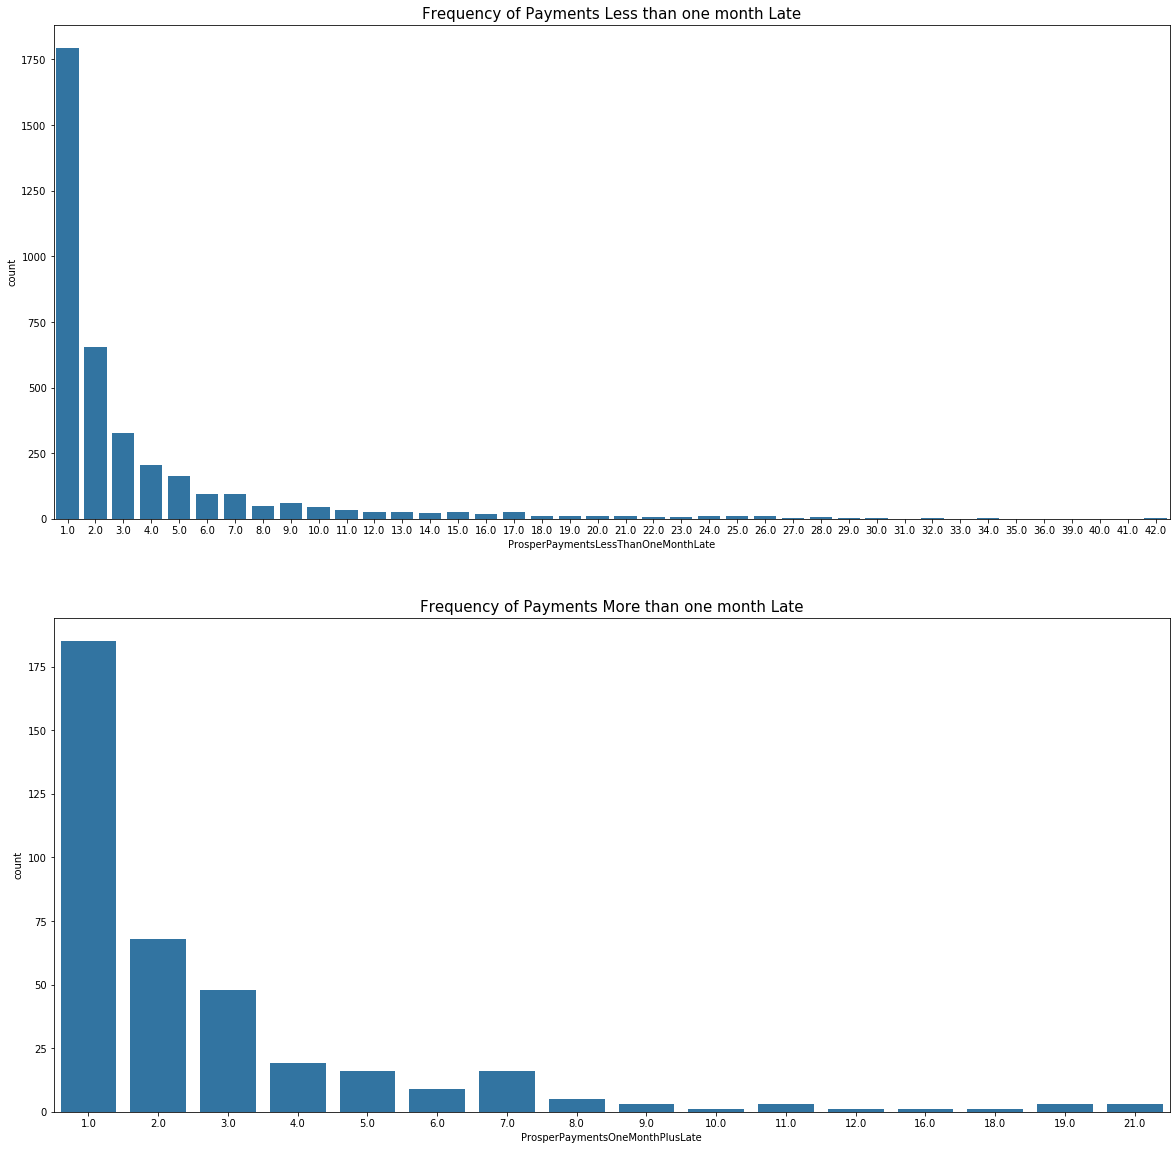

In [30]:
#Plot ProsperPaymentsLessThanOneMonthLate and ProsperPaymentsOneMonthPlusLate Distribution (after removing value=0)
df1=prosper_loan_sub.query('ProsperPaymentsLessThanOneMonthLate >=1.0')
df2=prosper_loan_sub.query('ProsperPaymentsOneMonthPlusLate >=1.0')
plt.figure(figsize = [20,20])

#plot ProsperPaymentsLessThanOneMonthLate without zero value to get better idea about defaulters
default_color = sb.color_palette()[0]
plt.subplot(2, 1, 1) #2 row, 1 column, subplot 1
sb.countplot(data = df1, x = 'ProsperPaymentsLessThanOneMonthLate', color = default_color)
plt.title('Frequency of Payments Less than one month Late', fontsize=15)

#plot ProsperPaymentsOneMonthPlusLate without zero value to get better idea about defaulters
plt.subplot(2, 1, 2) #2 row, 1 column, subplot 2
sb.countplot(data = df2, x = 'ProsperPaymentsOneMonthPlusLate', color = default_color);
plt.title('Frequency of Payments More than one month Late', fontsize=15);

>The first set of plots above give us a brief idea about the performance of Prosper loans. We can observe that the number of latepayments(less than one month) made by the borrowers in majority cases is 0 or 1. Similarly the number of times late payments(more than one month late) are made is mostly 0, though there are some cases of values 1.0 and 2.0. Having a high count of zero values in both cases increases investor confidence. 

> The second set of plots give us a better picture as we can now see that the number of non payments for more than a month and less than a month is quiet high. The number of two time defaulters for payments delayed for less than a month is almost around 700, three time defaulters is more than 250. The number of two time defaulters for payments delayed for more than a month is around 70 and for three time defaulters is around 50. So while the count of non-defaulter is quiet high we also need to explore defaulter information in more detail.

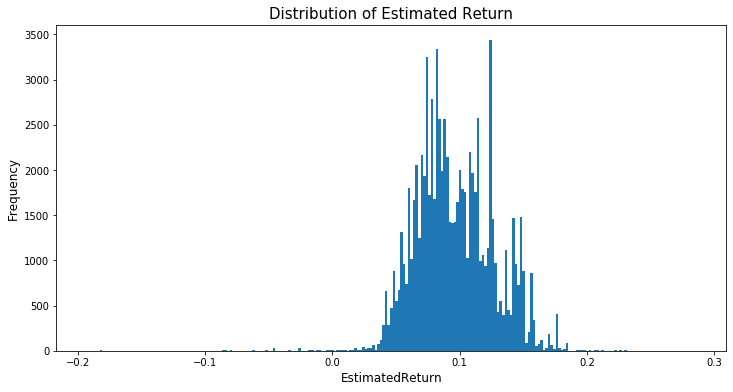

In [31]:
#plot the EstimatedReturn
plt.figure(figsize = [12,6])
default_color = sb.color_palette()[0]

#set up bins
bin_edges = np.arange(prosper_loan_sub['EstimatedReturn'].min()-0.01, prosper_loan_sub['EstimatedReturn'].max()+0.002, 0.002)

#plot histogram to explore the estimated return
plt.hist(data = prosper_loan_sub, x = 'EstimatedReturn', color = default_color, bins=bin_edges)
plt.xlabel('EstimatedReturn', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Estimated Return', fontsize=15);


> We can see from the plot above that most of the loans have an Estimated Return between the range 0.0-0.2 with peaks between 0.05 to 0.15. We can also see negative returns which indicate a greater chance of loss. We will need to analyse which features have a correlation to EstimatedReturn and indicate chances of negative estimated return.

>EstimatedReturn: The estimated return is assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

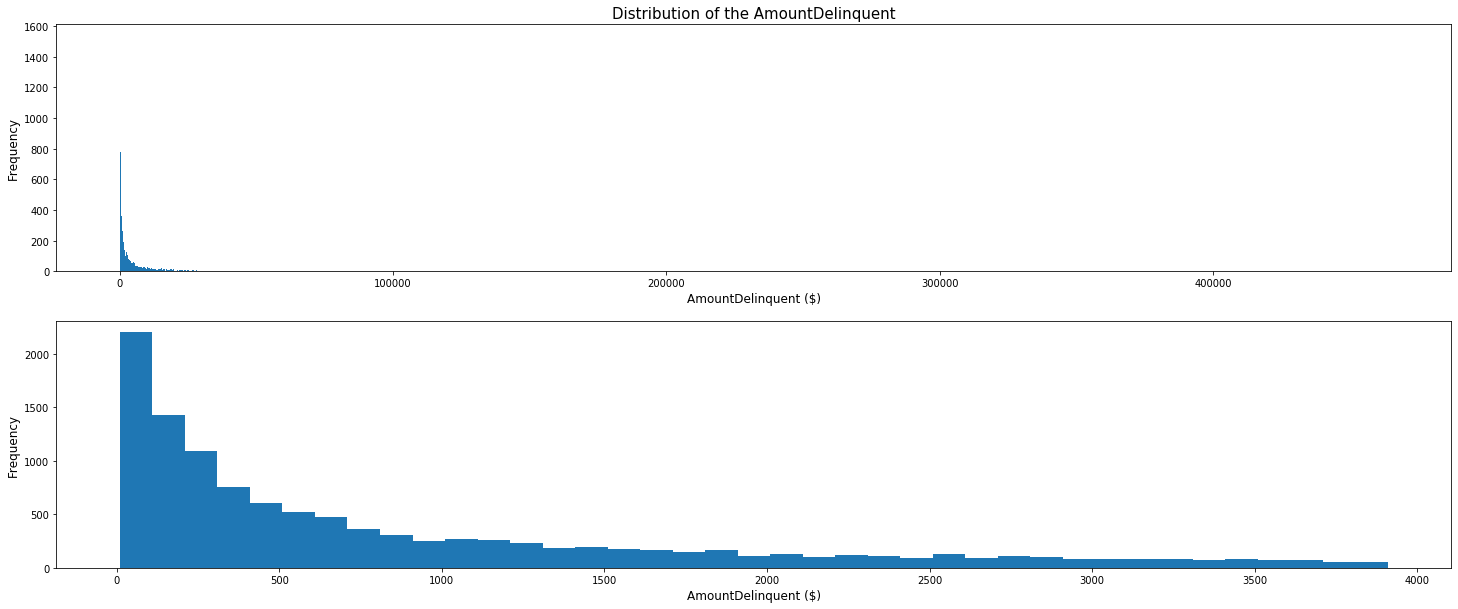

In [32]:
#plot the Distribution of AmountDelinquent
plt.figure(figsize = [25,10])
default_color = sb.color_palette()[0]

#set up subplots
plt.subplot(2, 1, 1)
#set up bins
bin_edges = np.arange(prosper_loan_sub['AmountDelinquent'].min()+100, prosper_loan_sub['AmountDelinquent'].max()+100, 100)

#plot the AmountDelinquent with outliers
plt.hist(data = prosper_loan_sub, x = 'AmountDelinquent', color = default_color, bins=bin_edges)
plt.xlabel('AmountDelinquent ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of the AmountDelinquent', fontsize=15)

#set up subplots
plt.subplot(2, 1, 2)
#set up bins
bin_edges = np.arange(10, 4000, 100)
#plot the AmountDelinquent in the range 100 to 4000
plt.hist(data = prosper_loan_sub, x = 'AmountDelinquent', color = default_color, bins=bin_edges)
plt.xlabel('AmountDelinquent ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12);



> We can observe from the first plot that lower value Delinquencies have higher count and there are outliers where amount delinquent can be as high a 4,00,000 dollars or more.
>In the second plot we can have a better picture of AmountDelinquent in the range 10-4000 dollars. We can see from the first plot that the count of borrowers who have zero AmountDelinquent is quiet high. From the second plot we can observe that no of borrowers who default on smaller amounts is higher than borrowers who default with higher amounts.
>Let us now observe the pattern for larger AmountDelinquent values.

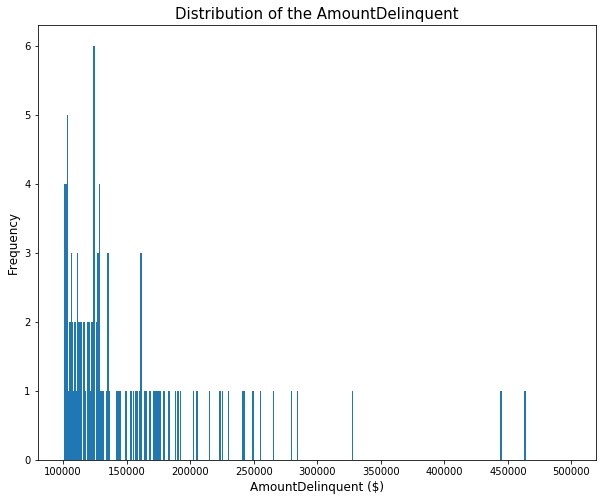

In [33]:
#plot the AmountDelinquent Distribution for range 1,00,000-5,00,000 dollars
plt.figure(figsize = [10,8])
default_color = sb.color_palette()[0]

#set up bins
bin_edges = np.arange(100000, 500000, 1000)
plt.hist(data = prosper_loan_sub, x = 'AmountDelinquent', color = default_color, bins=bin_edges)
plt.xlabel('AmountDelinquent ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of the AmountDelinquent', fontsize=15);


>From the three plots above we can observe that the AmountDeliquent has outliers at both ends. 
>From the first plot we can observe that AmountDeliquent for most listings is zero, followed by up until 4000 dollars.
> Since delinquency is an important factor for any investor we have further investigated the outliers which range between 1,00,000 to 5,00,000. We can see most outlier defaults are within 3,00,000 dollars with 3 cases above 3,00,000. Also the frequency of borrowers defaulting on large amounts is not very high. This increases investor confidence.

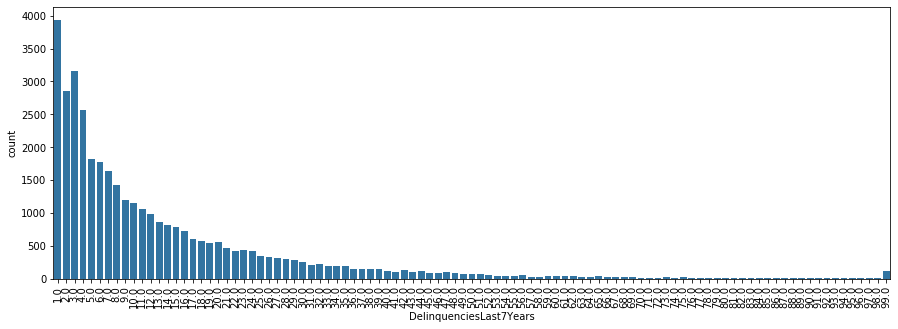

In [34]:
#plot the number of Delinquencies in the Last 7 Years
#remove 0 value as we want to observe no of borrowers who were delinquent
df4=prosper_loan_sub.query('DelinquenciesLast7Years >=1.0')

#plot the values
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df4, x = 'DelinquenciesLast7Years', color = base_color)
plt.xticks(rotation=90);

> We can observe that number of borrowers who have been delinquent once in last 7 years is maximum with a count of more than 3800. We can also observe that borrowers have been delinquent upto 99 times in last 7 years(outlier). It would be interesting to find the common features for borrowers who have more number of delinquencies.

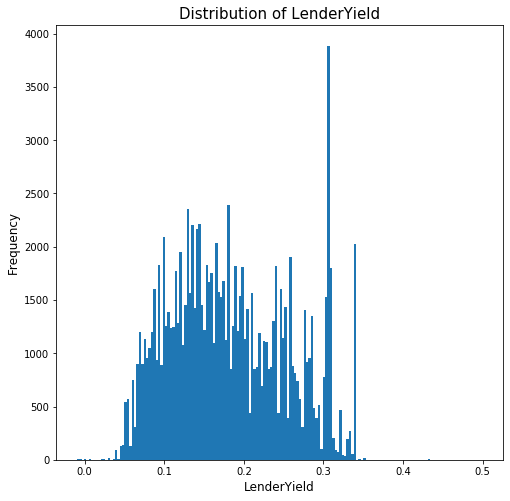

In [35]:
#plot the Lender Yield
plt.figure(figsize = [8,8])
default_color = sb.color_palette()[0]

#set up bins
bin_edges = np.arange(prosper_loan_sub['LenderYield'].min(), prosper_loan_sub['LenderYield'].max()+0.01, 0.003)
plt.hist(data = prosper_loan_sub, x = 'LenderYield', color = default_color, bins=bin_edges)
plt.xlabel('LenderYield', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of LenderYield', fontsize=15);


> Lender Yield is the interest rate less the servicing fee. We can see that the yield has a peak at 0.3 which is 30%, with most of the values between 0.05 and 0.35.

''

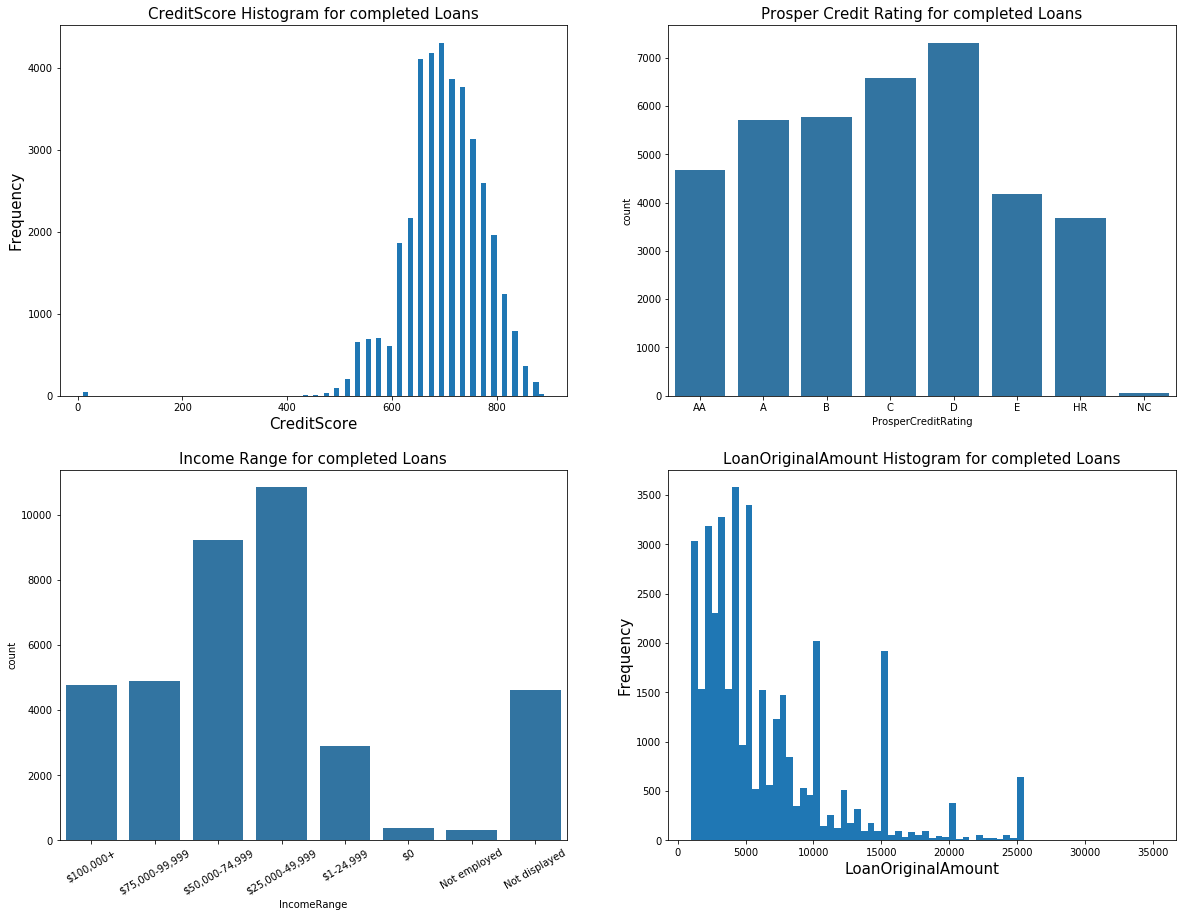

In [36]:
#extract rows which have LoanStatus = Completed
loan_completed=prosper_loan_sub.query('LoanStatus == "Completed"')

#set figure size
plt.figure(figsize = [20,15])
default_color = sb.color_palette()[0]

#plot the CreditScore for completed loans
plt.subplot(2, 2, 1) #2 row, 2 column, subplot 1
bin_edges = np.arange(loan_completed['CreditScore'].min(), loan_completed['CreditScore'].max()+10, 10)
plt.hist(data = loan_completed, x = 'CreditScore', color = default_color, bins=bin_edges)
plt.xlabel('CreditScore', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('CreditScore Histogram for completed Loans', fontsize=15)

#plot the ProsperCreditRating foe completed loans
plt.subplot(2, 2, 2) #2 row, 2 column, subplot 2
sb.countplot(data = loan_completed, x = 'ProsperCreditRating', color = default_color)
plt.title('Prosper Credit Rating for completed Loans', fontsize=15)

#plot the Income Range for the completed loans
plt.subplot(2, 2, 3) #2 row, 2 column, subplot 3
sb.countplot(data = loan_completed, x = 'IncomeRange', color = default_color)
plt.title('Income Range for completed Loans', fontsize=15)
plt.xticks(rotation=30)

#plot the LoanOriginal Amount for completed loans
plt.subplot(2, 2, 4) #2 row, 2 column, subplot 4
bin_edges = np.arange(loan_completed['LoanOriginalAmount'].min(), loan_completed['LoanOriginalAmount'].max()+100, 500)
plt.hist(data = loan_completed, x = 'LoanOriginalAmount', color = default_color, bins=bin_edges)
plt.xlabel('LoanOriginalAmount', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('LoanOriginalAmount Histogram for completed Loans', fontsize=15)
;

> To have a better understanding of the borrowers that have successfully closed their loans I have explored the CreditScore, ProsperCreditRating, IncomeRange and LoanOriginalAmount for borrowers who have already closed their loans and we can see that creditscore peaks at around 700, more number of borrowers have Prosper Credit Ratings of D and above, income range between mostly lies above 25,000 dollars and loan original amount is less than 5000 in most cases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>The Occupation column had a very high count for Other which doesnot specify any particular occupation so I replotted the graph excluding Other and finding the top 30 occupations.

>We can observe that Debt consolidation is more than 50% of Lisiting Categories with home improvement and business a second with around 7-8%. Not available and other are non specific categories.

> The percentage of loans chargedoff is around 10%. 

>IncomeRange is in the higher bracket with most borrowers having income more than 25,000(dollars) and more than 15,000 borrowers having an income greater than 1,00,000(dollars). Most of the income data shared is verified(more than 1,00,000)

>More than 2500 people have made more than 5 inquiries in the last six months.

>Most of the CreditScore falls under the range 500-900, though there is a outlier around 0. This needs to be looked into as Prosper has an eligibility criteria.

>Loan requests for amount less than 15,000 dollars is more.

>Debt to income ratio peaks at 0.2 though there are outliers at 10.01.

>The Amount Delinquent in most cases are less than 5000 but there are delinquencies with very large amounts. This needs to be investigated as it may result in huge loses for the investor.

>Estimated Return has a number of peaks in the range 5%-17% but there are negative estimated returns also.

>Borrowers have been delinquent for upto 99 times in the last 7 years. This is an interesting feature to analyse so that we can determine if delinquent borrowers have some commonality in occupation, income range etc.

>LenderYield has negative values which we need to explore further.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The ProsperRating (Alpha) and CreditGrade both are credit ratings provided by Prosper. The ProsperRating is valid from July, 2009 and CreditGrade is available for before 2009. Hence to tidy the data I have merged the two columns as they are the same feature. 

>The employment status had categories employed, full-time and part-time. I merged the three values to employed because full and part time come under the category employed.

>I have changed ListingCategory from numeric to categorical values and the datatype from int to categorical data type. This is to make it visually easier to understnd the performance of each category.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. 

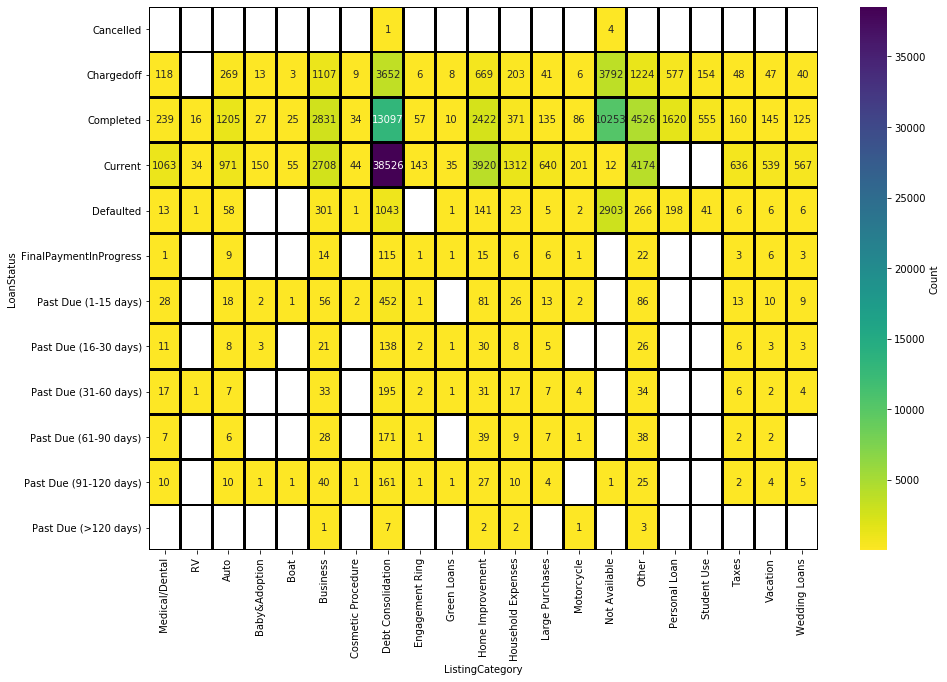

In [37]:
#plot the relationship between 2 categorical variables ListingCategory and LoanStatus using heat map
#summarise counts into matrix so that they caan be plotted
loan_counts = prosper_loan_sub.groupby(['ListingCategory', 'LoanStatus']).size()
loan_counts=loan_counts.reset_index(name='count')
loan_counts = loan_counts.pivot(index = 'LoanStatus', columns = 'ListingCategory', values = 'count')

#plot the heatmap 
plt.figure(figsize = [15,10])
sb.heatmap(loan_counts, annot = True, fmt = '.0f',cmap = 'viridis_r',cbar_kws={'label': 'Count'},linewidths=2, linecolor='black');

>In the above heatmap showing the relationship between two categorical variables ListingCategory and LoanStatus we can make some interesting observations.
- The listing category Debt Consolidation has the maximum number of current and completed loans and second largest number of charged off loans, the first being a category which is no longer available.
- The category which is no longer available has the worst performance in terms of defaulted and chargedoff loans.
- DebtConsolidation comes a close second in defaulted and charged of loans, but as we can see from the current and completed loans the volume of this category is very high and hence the % of defaulted and charged off loans would be much lower values.
- Business , Other and Personal loans are categories which have large number off chargedoff and defaults.

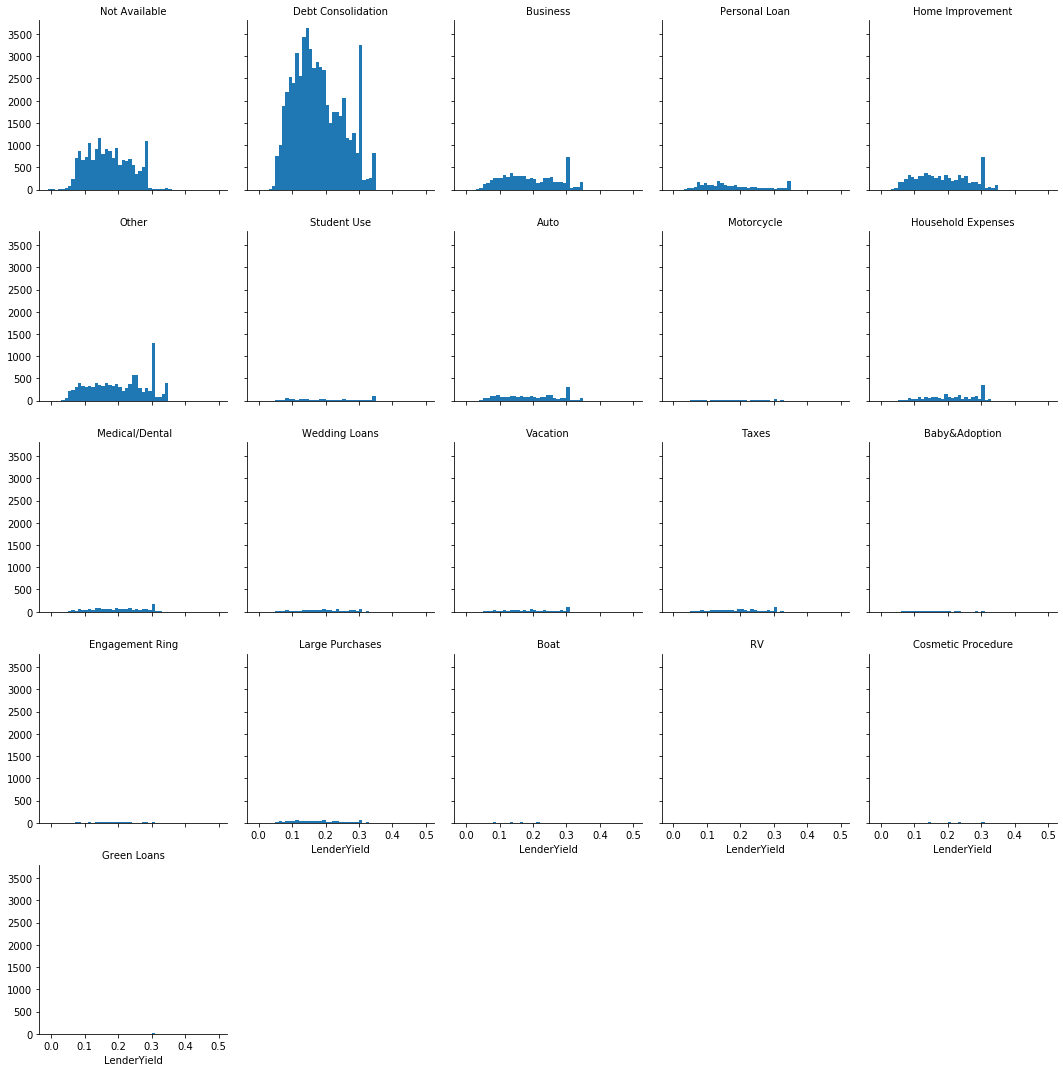

In [38]:
#plot the lender yield for different listing categories
g = sb.FacetGrid(data = prosper_loan_sub, col = 'ListingCategory', col_wrap = 5)
g.map(plt.hist, 'LenderYield',
      bins = np.arange(prosper_loan_sub['LenderYield'].min(), prosper_loan_sub['LenderYield'].max()+0.01, 0.01))
g.set_titles('{col_name}');

> We can observe that DebtConsolidation has peaks around 0.15 and 0.3, but most of the yield values range between 0.1 and 0.2. 

>Medical/Dental, Other, Auto, Business, Home Improvement, Household Expense have peaks at 0.3. This shows a probability of getting interest at around 30%.

>Personal Loan has a peak around 0.35. For Debt Consolidation the range for yield is from 0.04 to 3.5

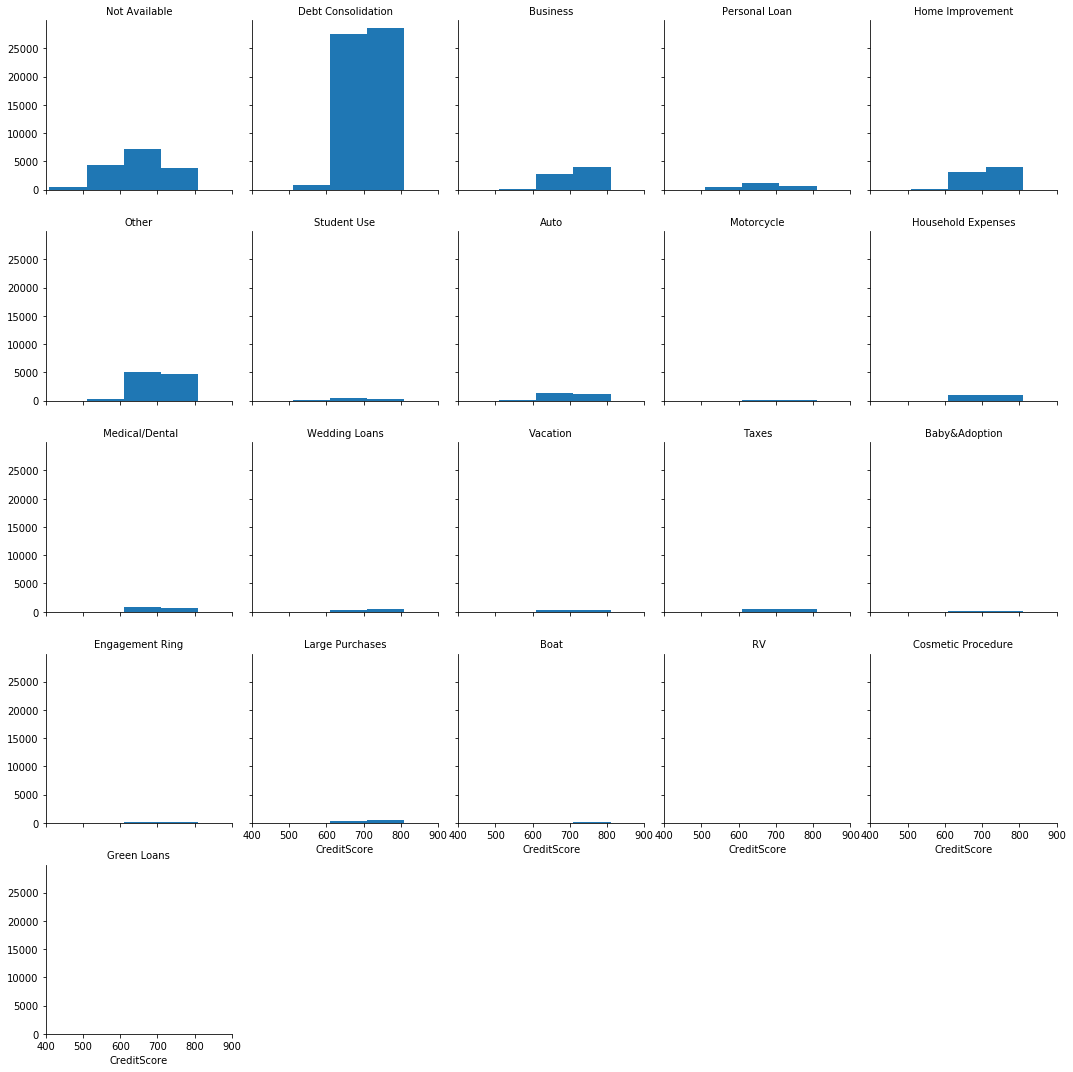

In [39]:
#plot the Credit Score for different listing categories
#create bins
bin_edges = np.arange(prosper_loan_sub['CreditScore'].min(), prosper_loan_sub['CreditScore'].max()+10, 100)
#plot a facetgrid to observe relation between Credit Score and Listing Categories
g = sb.FacetGrid(data = prosper_loan_sub, col = 'ListingCategory', col_wrap = 5)
g.map(plt.hist, 'CreditScore', bins=bin_edges)
g.set_titles('{col_name}')
g.set(xlim=(400, 900));

>Debt Consolidation has Credit Scores in the range 600-800 which are good scores and indicate lower risk factor.

>Business. Home Improvement , Other all have peaks at the range 600-800.

> Boats have a credit score range of 700-800 which is quiet high, indicating that it is a luxury item and people taking loans to buy it are financially more stable.

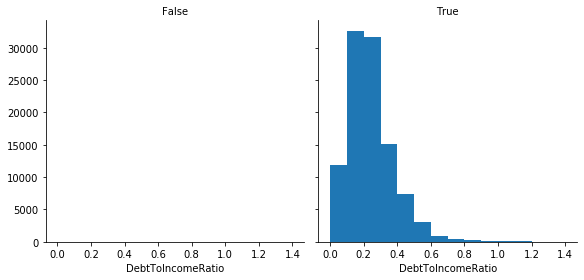

In [40]:
#plot the IncomeVerifiable v/s DebtToIncomeRatio

g = sb.FacetGrid(data = prosper_loan_sub, col = 'IncomeVerifiable', col_wrap = 3, height = 4)
g.map(plt.hist, 'DebtToIncomeRatio', bins = np.arange(prosper_loan_sub['DebtToIncomeRatio'].min(),1.5, 0.1))
g.set_titles('{col_name}');

> We can see that when IncomeVerifiable is False then DebtToIncomeRatio data is not available in the range 0-1.5. This reduces the investor confidence if two important features are not available.

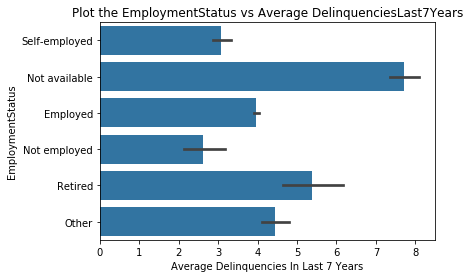

In [41]:
#plot the EmploymentStatus and mean of Delinquenciesin Last 7 Years 
#set the base color and plot a barplot
base_color = sb.color_palette()[0]
sb.barplot(data = prosper_loan_sub, y = 'EmploymentStatus', x = 'DelinquenciesLast7Years', color = base_color)
plt.xlabel('Average Delinquencies In Last 7 Years')
plt.title('Plot the EmploymentStatus vs Average DelinquenciesLast7Years');


> From the above graph we can see that the average Delinquencies in Last 7 Years is maximum for EmploymentStatus 'not available' followed by retired and other. Self-employed and employed borrowers have relatively lower delinquencies and short error bars. Surprisingly not employed borrowers have the lowest mean delinquencies but the error bar is second longest with retired borrowers having the longest error bar. The errorbars represent uncertainity in mean based on variance and sample size.

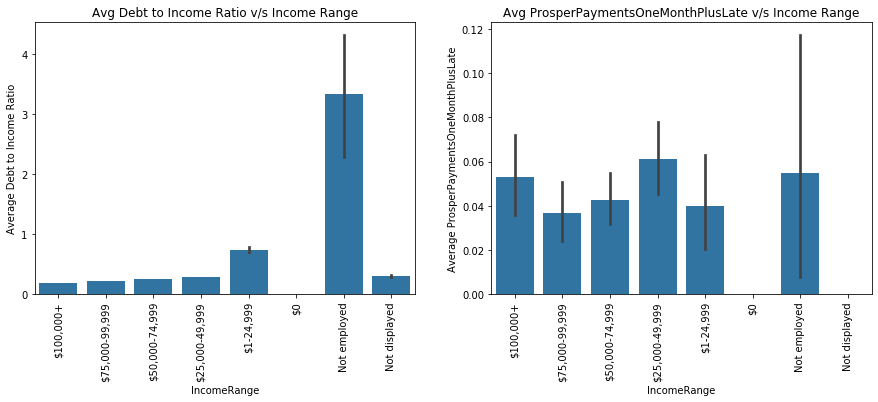

In [42]:
#plot the IncomeRange v/s Average Debt To Income Ratio & Average ProsperPaymentsOneMonthPlusLate
#set the base color and size a barplot
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
#plot Debt to Income Ratio and Income Range
#subplot 1
plt.subplot(1, 2, 1)
sb.barplot(data = prosper_loan_sub, x = 'IncomeRange', y = 'DebtToIncomeRatio', color = base_color)
plt.ylabel('Average Debt to Income Ratio')
plt.title('Avg Debt to Income Ratio v/s Income Range')
plt.xticks(rotation = 90);

#plot ProsperPaymentsOneMonthPlusLate and IncomeRange
#subplot 2
plt.subplot(1, 2, 2)
sb.barplot(data = prosper_loan_sub, x = 'IncomeRange', y = 'ProsperPaymentsOneMonthPlusLate', color = base_color)
plt.ylabel('Average ProsperPaymentsOneMonthPlusLate')
plt.title('Avg ProsperPaymentsOneMonthPlusLate v/s Income Range')
plt.xticks(rotation = 90);

> Borrowers who are not employed have the highest debt to income ratio followed by 1-24,999 dollar income range. 75,000-99,999 and 50,000-74,999 dollars Income range borrowers have low Average Debt-to-Income ratio and smaller average ProsperPaymentsOneMonthPlusLate value. We can also observe that the error bars are longer for not employed in both plots.

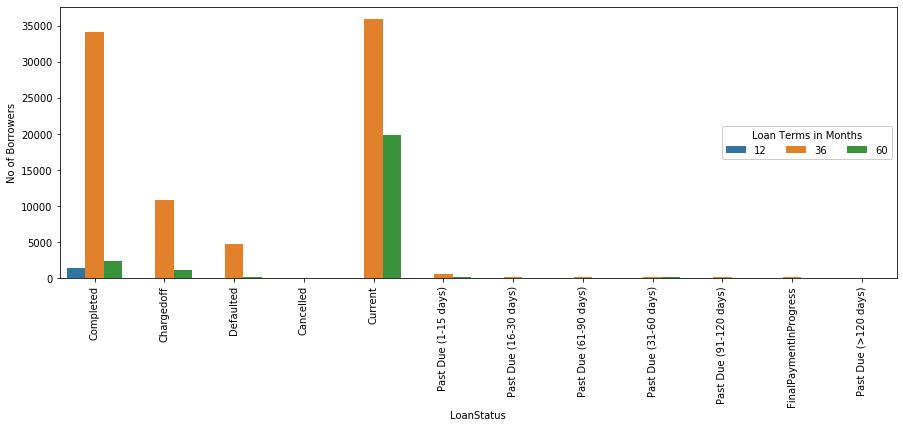

In [43]:
#plot loan term v/s loan status
plt.figure(figsize = [15, 5])
ax = sb.countplot(data = prosper_loan_sub, x = 'LoanStatus', hue = 'Term')
ax.legend(loc = 5, ncol = 8, framealpha = 1, title = 'Loan Terms in Months')
plt.xticks(rotation=90)
plt.ylabel('No of Borrowers');

>We can see that the Loan Term of 36 months has the most frequency followed by 60 months. 

> From the plot we can see that 12 months term is only available for completed loans hence there is a high probability that 12 month loans are no longer available.


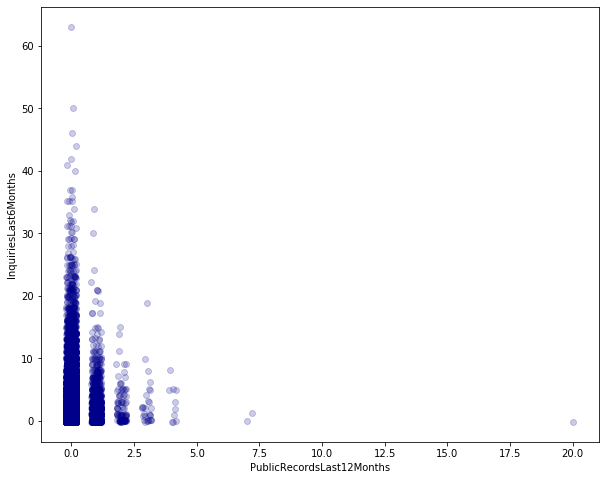

In [44]:
#plot InquiriesLast6Months v/s PublicRecordsLast12Months
plt.figure(figsize = [10, 8])
sb.regplot(data = prosper_loan_sub, y = 'InquiriesLast6Months', x = 'PublicRecordsLast12Months', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'color':"darkblue" ,'alpha' : 1/5});

>We can see that borrowers with less number of public records in the last 12 months have more number of Inquiries in the last 6 months.

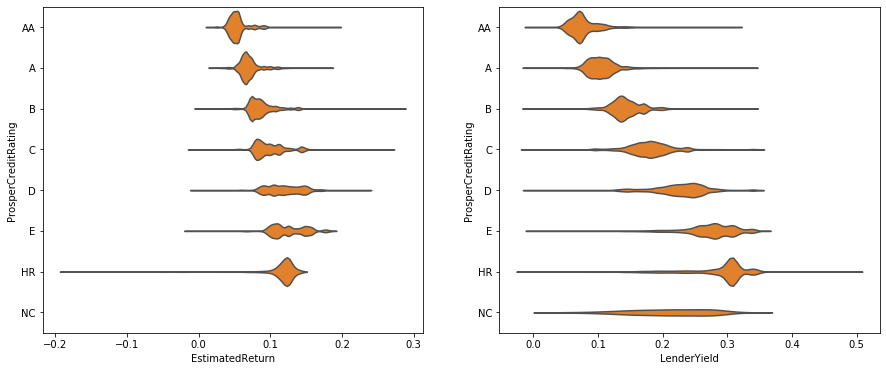

In [45]:
#plot ProsperCreditRating v/s Estimated Return and ProsperCreditRating v/s LenderYield as subplots to compare
plt.figure(figsize = [15, 6])
base_color = sb.color_palette()[1]

#plot ProsperCreditRating v/s Estimated Return
plt.subplot(1, 2, 1)
sb.violinplot(data = prosper_loan_sub, x = 'EstimatedReturn', y = 'ProsperCreditRating', color = base_color,
              inner = None)

#plot ProsperCreditRating v/s LenderYield
plt.subplot(1, 2, 2)
sb.violinplot(data = prosper_loan_sub, x = 'LenderYield', y = 'ProsperCreditRating', color = base_color,
              inner = None);

> We can see that Estimated Return has better returns for ProsperRatings B, C and D. HR has a higher peak than B, and C but it also has a huge number of outliers with low and negative results.

>LenderYield gives us a different picture where HR has the best returns followed by E and D. Since LenderYield does not consider the estimated loss the risk factor of the HR category is not clearly visible in this plot.

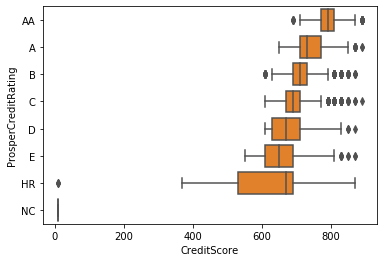

In [46]:
#plot the relation between ProsperCreditRating and CreditScore
sb.boxplot(data = prosper_loan_sub, x = 'CreditScore', y = 'ProsperCreditRating', color = base_color,
         )

>We can observe than borrowers with AA ratings have higher credit scores, followed by A,B and C. Borrowers with HR ProsperCreditRating have lowest credit ratings.

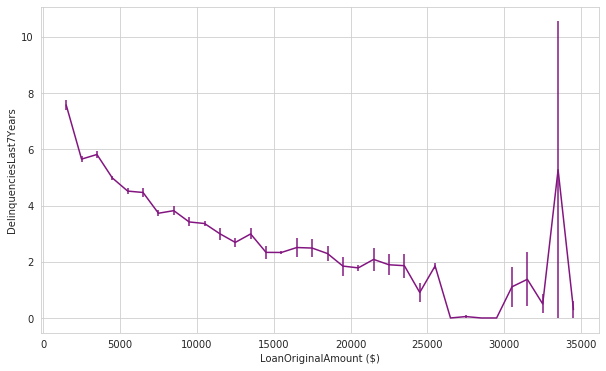

In [47]:
#plot a line plot for LoanOriginalAmount v/s mean of DelinquenciesLast7Years
plt.figure(figsize = [10, 6])
# set bin edges, compute centers
bin_size = 1000
xbin_edges = np.arange(prosper_loan_sub['LoanOriginalAmount'].min(), prosper_loan_sub['LoanOriginalAmount'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
#https://www.geeksforgeeks.org/python-pandas-dataframe-sem/
data_xbins = pd.cut(prosper_loan_sub['LoanOriginalAmount'], xbin_edges, right = False, include_lowest = True)
y_means = prosper_loan_sub['DelinquenciesLast7Years'].groupby(data_xbins).mean()
y_sems = prosper_loan_sub['DelinquenciesLast7Years'].groupby(data_xbins).sem() #calculate the standard error

# plot the summarized data
with sb.color_palette("BuPu_r"): #https://seaborn.pydata.org/generated/seaborn.color_palette.html
    with sb.axes_style("whitegrid"): 
        plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
        plt.xlabel('LoanOriginalAmount ($)')
        plt.ylabel('DelinquenciesLast7Years');

> In the line plot we can see that there is a decrease in the average Delinquencies in Last 7 Years with increase in loan amount but the for loan amounts above 30k the standard error of the mean increases.

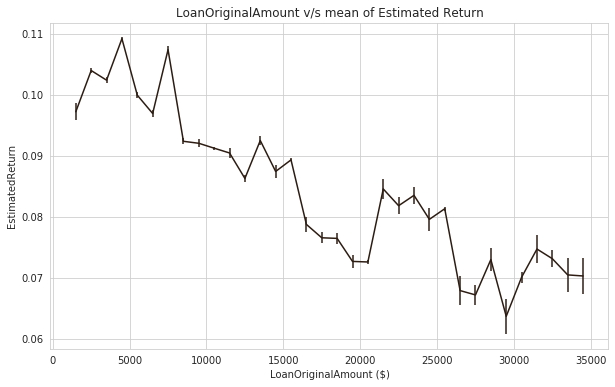

In [48]:
#plot a line plot for LoanOriginalAmount v/s mean of Estimated Return
plt.figure(figsize = [10, 6])
# set bin edges, compute centers
bin_size = 1000
xbin_edges = np.arange(prosper_loan_sub['LoanOriginalAmount'].min(), prosper_loan_sub['LoanOriginalAmount'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
#https://www.geeksforgeeks.org/python-pandas-dataframe-sem/
data_xbins = pd.cut(prosper_loan_sub['LoanOriginalAmount'], xbin_edges, right = False, include_lowest = True)
y_means = prosper_loan_sub['EstimatedReturn'].groupby(data_xbins).mean()
y_sems = prosper_loan_sub['EstimatedReturn'].groupby(data_xbins).sem() #calculate the standard error

# plot the summarized data
with sb.color_palette("copper"): #https://seaborn.pydata.org/generated/seaborn.color_palette.html
    with sb.axes_style("whitegrid"): 
        plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
        plt.xlabel('LoanOriginalAmount ($)')
        plt.ylabel('EstimatedReturn')
        plt.title('LoanOriginalAmount v/s mean of Estimated Return');

>We can see from this plot that the estimated return is higher for smaller values of LoanOriginalAmount but the standard error of mean is more for amounts greater than 30,000 dollars

C:\Users\Arshi Saleh\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


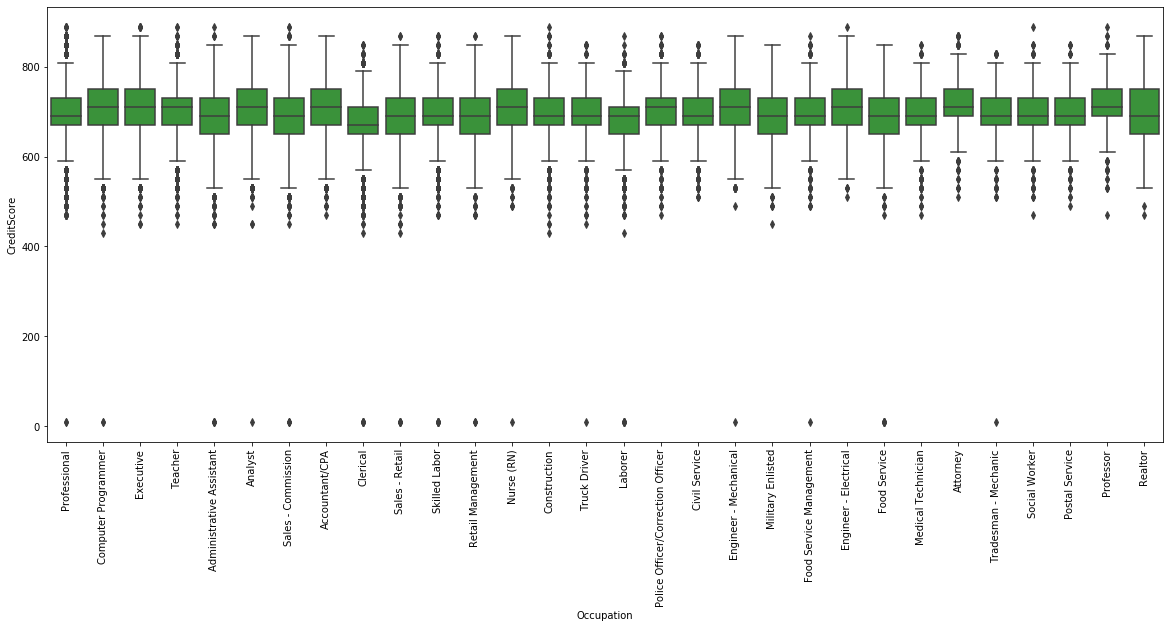

In [49]:
#plot a boxplot 'Occupation' v/s 'CreditScore'
#we will remove the outlier Other in Occupation and only consider the top 30 Occupations with highest frequency
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[2]

#plot the boxplot
df['CreditScore']=(df['CreditScoreRangeLower']+df['CreditScoreRangeUpper'])/2
sb.boxplot(data = df, x = 'Occupation', y = 'CreditScore', color = base_color, order = occupation_order2)
plt.xticks(rotation=90);

> We can see from the box plot that borrowers in the Construction field have lower creditscores and maximum outliers in the lower range. Attorney and Professors have maximum scores above 700. Computer Programmer, Executive , Analyst, Nurse, Engineer Mechanical and Electrical being other occupations where borrowers have good creditscores.

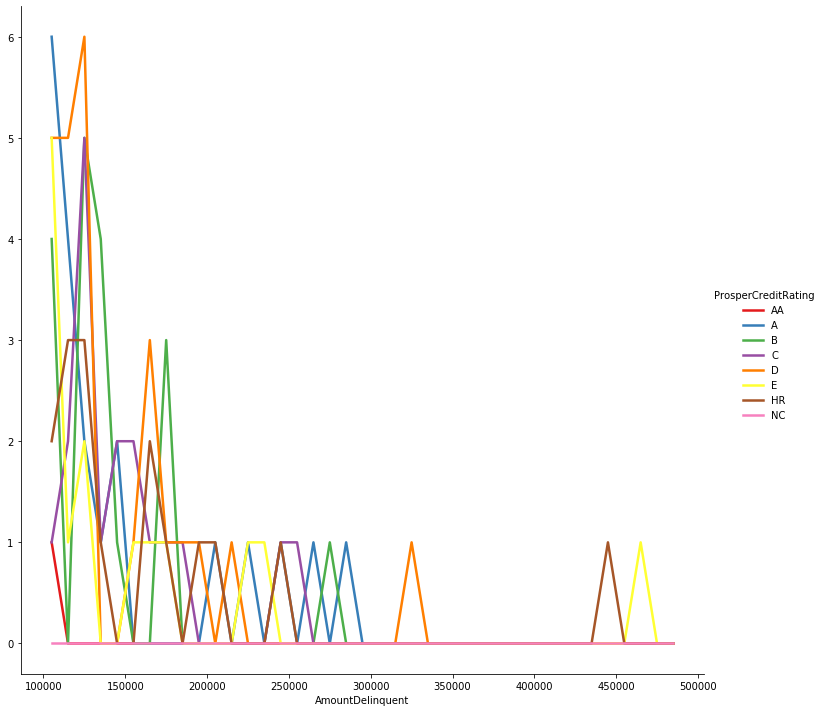

In [50]:
#plot the ProsperCreditRating v/s AmountDelinquent (for values above 1,00,000 dollars)
#https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
def freq_poly(x, bins = 15, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)
    
    
with sb.color_palette("Set1", n_colors=8): #https://seaborn.pydata.org/generated/seaborn.color_palette.html
    bin_edges = np.arange(100000,500000 , 10000)
    g = sb.FacetGrid(data = prosper_loan_sub, hue = 'ProsperCreditRating', height =10)
    g.map(freq_poly, "AmountDelinquent", bins = bin_edges, linewidth=2.5)
    g.add_legend();

>We can see from the above line plot that borrowers having ProsperCreditRatings HR and E have the highest Amount Delinquent followed by D. Borrowers having rating AA have the least amount of borrowers having high delinquencies. The surprise factor is the borrowers with rating C have lower numbers in high delinquent amount as compared to A and B.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1.We observed the relationship between Listing Category and Loan Status, LenderYield and CreditScore. 
- We can see that DebtConsolidation is the best performing category in terms of count, number of completed, current and FinalPaymentInProgress. Most of the borrowers have creditscore between 600-800. Hence Debt Consolidation followed by Business and Home Improvement will be categories with lower risk. 
- Business, Home Improvement and Other also have peaks at higher yield but Business and Other also have a very high proportion of ChargeOff and defaulted loans. If you are looking for a low risk investment then Debt Consolidation would be a good category and for higher risk with better return Home Improvement followed by Business and Other would be options. 

> 2.Employment Status 'not available' followed by 'retired' have maximum average delinquencies in last 7 years.

> 3.Average Debt-To-Income Ratio is higher for Income Range category 'not employed'.

> 4.Average ProsperPaymentOneMonthPlusLate is higher for Income Range category '25,000-49,999' dollars but the error bar is much longer for 'not employed' category

> 5.Estimated Return has better returns for ProsperRatings B, C and D. LenderYield gives us a different picture where HR has the best returns followed by E and D.

> 6.Borrowers with higher ProsperCreditRatings also have a higher CreditScore.

> 7. Borrowers with lower original loan amount have greater number of delinquencies in the last 7 years but the standard error of mean increases when original loan amount is greater than 30,000 dollars. This might indicate that loan amounts higher than 30,000 might be more risky investments.

> 8. Borrowers with occupation clerical and labourer have the lowest credit scores though the number of borrowers in these occupations fall within the top 30 most frequent occupations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the clustered bar chart for LoanStatus v/s Term we can see the term 12 months having values only in the completed category of LoanStatus. This is interesting and probably a reflection that the term 12 months is not available in current loans.

> ProsperCreditRatings A and B have more number of borrowers having huge Delinquent Amounts as compared to rating C.

> Borrowers with lower Public Records in last 12 months have more Inquiries in last 6 months. This might be a reflection of the prosper eligibility criteria. Investor confidence is increased in the platform if people with greater number of public records in last 12 months are not eligible for inquiries.

## Multivariate Exploration


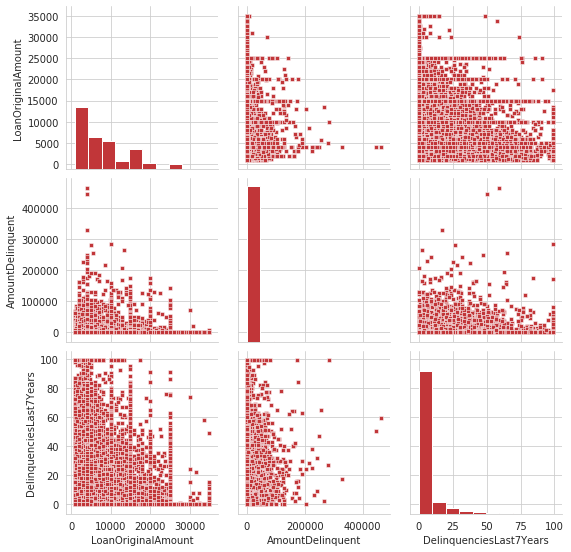

In [51]:
# plot a pairgrid plot to explore relationship between LoanOriginalAmount, AmountDelinquent and DelinquenciesLast7Years
borrower_stats=['LoanOriginalAmount', 'AmountDelinquent','DelinquenciesLast7Years']

with sb.color_palette("RdBu"):
    with sb.axes_style("whitegrid"):
        g = sb.PairGrid(data = prosper_loan_sub, vars = borrower_stats,
        hue_kws={"marker": ["s"]}) #https://seaborn.pydata.org/generated/seaborn.PairGrid.html
        g.map_diag(plt.hist)
        g.map_offdiag(plt.scatter, edgecolor="w", s=20, linewidths=0.5);


> We can observe than borrowers with lower values of OriginalLoanAmount have more number of delinquencies in last 7 years as compared to borrowers who had high values of original loan amounts.

> Similar relationship is observed between Loan OriginalAmount and AmountDelinquent, borrowers with lower values of original loan amount have higher amount delinquent as compared to borrowers with smaller value of original loan amount.

> Most of the borrowers having high number of delinquencies in the last 7 years have relatively lower delinquentamounts. The probable reason can be that when lending higher amounts there is a tighter check on the financials of the borrower.

''

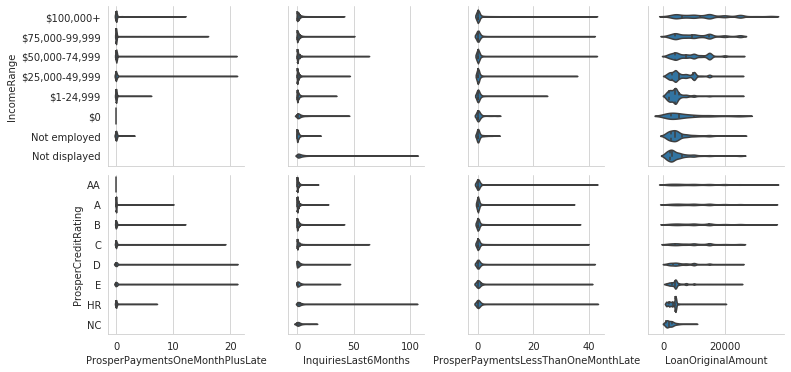

In [52]:
#explore relationship between numerical & categorical variables using pairgrid
#plot a violin plot to understand the relationship between IncomeRange, ProsperCreditRating ProsperPaymentsOneMonthPlusLate, ProsperPaymentsLessThanOneMonthLate
#LoanOriginalAmount and InquiriesLast6Months 
#https://seaborn.pydata.org/generated/seaborn.PairGrid.html
with sb.axes_style("whitegrid"):
    g = sb.PairGrid(data = prosper_loan_sub, x_vars = ['ProsperPaymentsOneMonthPlusLate', 'InquiriesLast6Months', 
                                                   'ProsperPaymentsLessThanOneMonthLate', 'LoanOriginalAmount'],
                y_vars = ['IncomeRange','ProsperCreditRating'])
    g.map(sb.violinplot, inner = 'quartile')
;

> We can observe that income range 50,000-74,999 and 25,000-49,999 dollars and ProsperCreditRating D and E have the most number of outliers in relation to ProsperPaymentsOneMonthPlusLate.

>The InquiriesLast6Months has maximum outliers for ProsperCreditRating HR and IncomeRange Not Displayed followed by 50,000-74,999 dollars

>ProsperPaymentsLessThanOneMonthLate has maximum outliers for ProsperCreditRating AA followed by HR and D and for IncomeRange 50,000-74,999 , 75,000-99,999 and 1,00,000+ dollars.

>We can observe that LoanOriginalAmount decreases with the decrease in ProsperCreditRating. This increases investor confidence that Prosper performs the necessary checks before giving loans.

In [53]:
#group all the different PastDue LoanStatus into single category PastDue
prosper_loan_sub["LoanStatus"].replace({"Past Due (1-15 days)": "PastDue", "Past Due (31-60 days)": "PastDue", 
                          "Past Due (61-90 days)": "PastDue", "Past Due (91-120 days)": "PastDue",
                        "Past Due (16-30 days)": "PastDue", "Past Due (>120 days)": "PastDue"}, inplace=True)

#exclude "Cancelled" from the LoanStatus
loan_df=prosper_loan_sub[prosper_loan_sub['LoanStatus'].isin(["Current","Completed","Chargedoff","Defaulted","PastDue","FinalPaymentInProgress"])]
#set the order for occupation and we will limit this variable to the top five most frequent occupations
occupation_order=prosper_loan_sub['Occupation'].value_counts().head(6).index


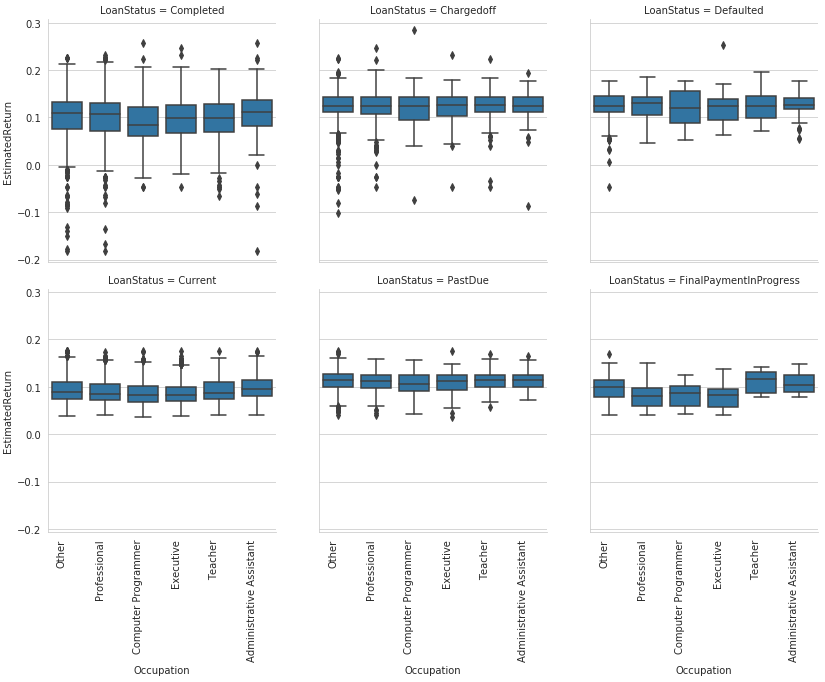

In [54]:
#facet bivariate plots to create a multivariate visualization
#plot boxplot for LoanStatus v/s Occupation v/s Estimated Return
with sb.axes_style("whitegrid"):
    g = sb.FacetGrid(data = loan_df, col = 'LoanStatus', height = 4, col_wrap = 3)
    g.map(sb.boxplot, 'Occupation', 'EstimatedReturn',order=occupation_order)

#https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90, horizontalalignment='right');

> This plot is very interesting , we can see that administrative assistant have higher estimated returns for all categories and LoanStatus "Chargedoff" and "Defaulted" have higher estimated returns compared to other loanstatus categories.

> I have included other in this chart which was previously excluded in the univariant exploration because there are a huge number of borrowers who do not disclose their occupation. In this plot we can observe that professional and other have similar boxplots in all cases except FinalPayment in progress. This reflects that professional is also a generalised category like Other.

In [55]:
#We will consider Employment Status categories of Employed, Self-employed, Not employed and Retired
#dropping Not available and other category as they are not specific
employment_df=prosper_loan_sub[prosper_loan_sub['EmploymentStatus'].isin(['Employed','Self-employed','Not employed','Retired'])]

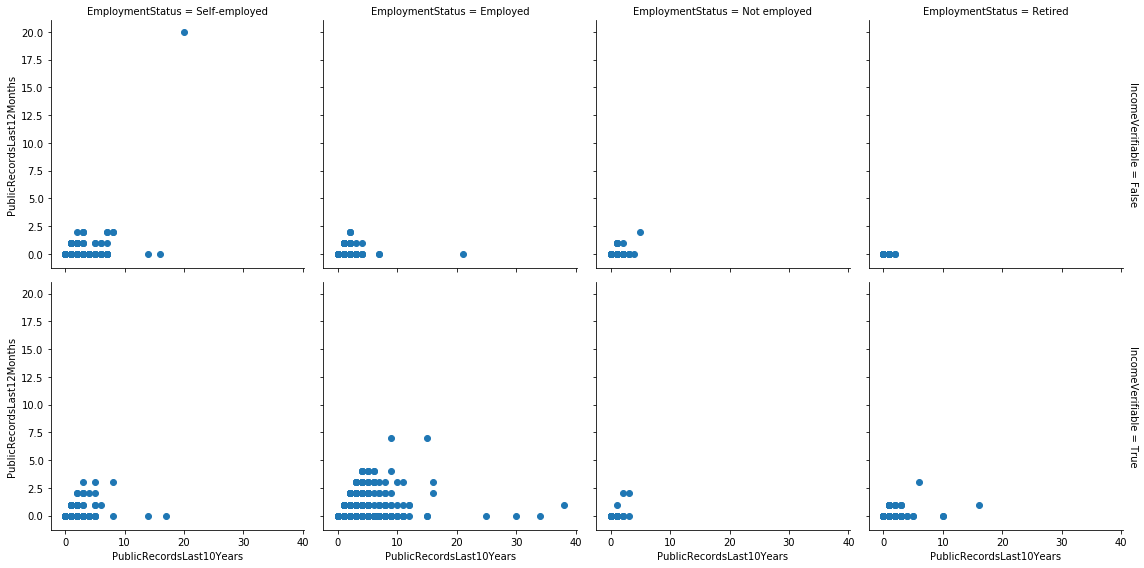

In [56]:
#plot the relation between EmploymentStatus v/s IncomeVerifiable v/s PublicRecordsLast10Years v/s PublicRecordsLast12Months
g = sb.FacetGrid(data = employment_df, col = 'EmploymentStatus', row = 'IncomeVerifiable', height = 4,
                margin_titles = True)
g.map(plt.scatter, 'PublicRecordsLast10Years', 'PublicRecordsLast12Months');

> We can see that for IncomeVerifiable=False we have outliers only for EmploymentStatus self-employed whereas for IncomeVerifiable=True the reverse is true. Employment Status not-employed has no outliers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I have observed that when the value of OriginalLoanAmount is smaller then their are higher chances of more number of delinquencies and a larger delinquent amount. The reason behind this could be that more checks are performed before issuing higher amounts of loan.
>This observation is further supported when we observe the relationship between OriginalLoanAmount and ProsperCreditRating and IncomeRange. Borrowers having higher values of OriginalLoanAmount also have higher income ranges and higher ProsperCreditRatings.

### Were there any interesting or surprising interactions between features?

> One of the interesting observations were that there were more outliers in PublicRecordsLast10Years for EmploymentStatus employed when Income was verified. This is probably an indication that when income is verified then it is easier to get a loan.